<a href="https://colab.research.google.com/github/RaychalNadar/CustomerSegmentation_KMeans_Clustering_ML/blob/main/E_Commerce_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# E-Commerce Customer Segmenatation

### Downloading Libraries

In [59]:
!pip install sklearn.preprocessing

### Importing Libraries

In [60]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

#### Ignoring Warnings

In [61]:
warnings.filterwarnings("ignore")

### Loading Dataset

In [62]:
df=pd.read_excel('/content/sample_data/ecom_customer_data - Copy.xlsx')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1


### Preparation/Cleaning of Data

In [63]:
df.shape

(30000, 38)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [65]:
print("Gender has",30000-27276,"null values.")

Gender has 2724 null values.


In [66]:
df.Gender.fillna(df.Gender.mode()[0],inplace=True)

In [67]:
df.Gender.isnull().sum()

0

In [68]:
if(df.duplicated().sum()==0):
    print("No Duplicate rows present")
else:
    print("Duplicate rows are present")

No Duplicate rows present


### Understanding of Data

##### Understanding of Cust_ID Column

In [69]:
if(df.duplicated(subset='Cust_ID').sum()==0):
    print("Cust_Id is unique identifier")
else:
    print("Cust_Id is not a unique identifier")

Cust_Id is unique identifier


##### Understanding of Gender Column

In [70]:
df.Gender.value_counts()

Gender
F    24778
M     5222
Name: count, dtype: int64

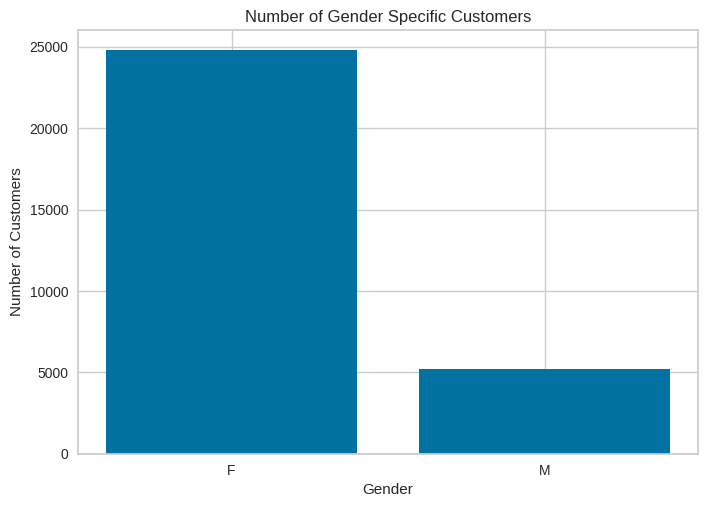

In [71]:
plt.bar(df.Gender.value_counts().index,df.Gender.value_counts().values)
plt.xlabel("Gender")
plt.ylabel('Number of Customers')
plt.title('Number of Gender Specific Customers')
plt.show()

##### Understanding of Orders Column

In [72]:
df.Orders.value_counts()

Orders
0     7294
1     2716
2     2422
7     2207
3     2199
4     2192
8     2080
6     2039
5     2010
9     1993
10    1938
12     469
11     441
Name: count, dtype: int64

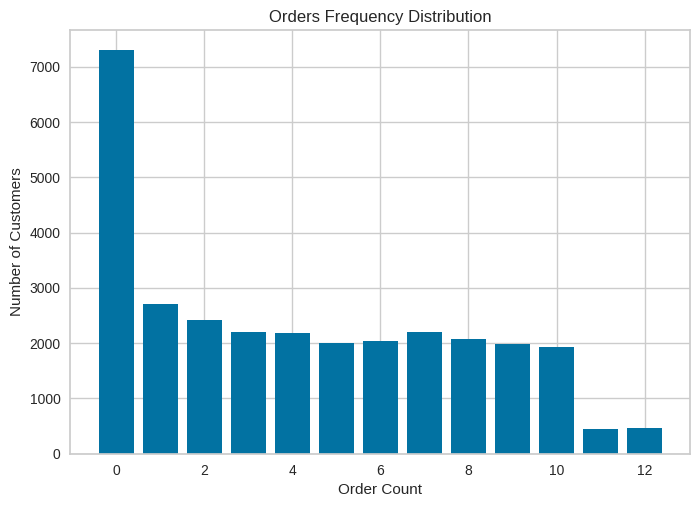

In [73]:
plt.bar(df.Orders.value_counts().index,df.Orders.value_counts().values)
plt.xlabel('Order Count')
plt.ylabel('Number of Customers')
plt.title('Orders Frequency Distribution')
plt.show()

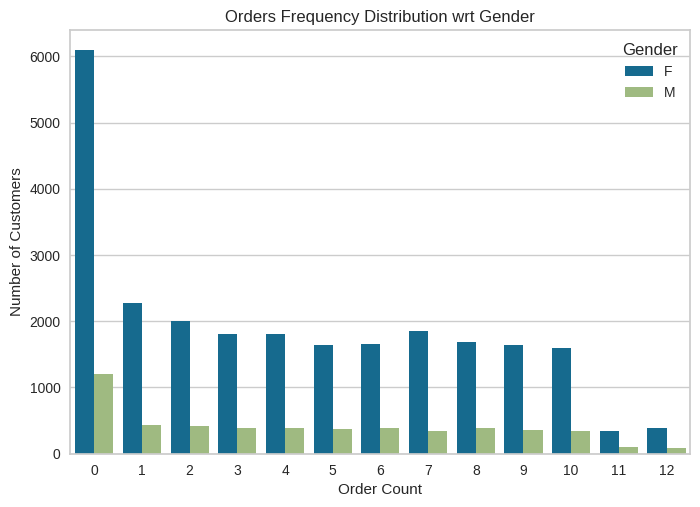

In [74]:
sns.countplot(data=df,x='Orders',hue='Gender')
plt.xlabel('Order Count')
plt.ylabel('Number of Customers')
plt.title('Orders Frequency Distribution wrt Gender')
plt.show()

In [75]:
df['Total_Searches']=df.iloc[:,3:].sum(axis=1)
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total_Searches
0,1,M,7,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1,2,F,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0,18
2,3,M,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5
3,4,F,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4,5,F,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1,16


In [76]:
df.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total_Searches
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,0.094267,0.140133,0.328200,0.209333,0.141467,0.161100,0.106100,0.300233,0.048067,0.754800,0.247900,0.470833,0.258000,0.118767,0.031967,0.428033,0.121333,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900,6.871433
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,0.531592,0.471278,0.807655,1.116820,0.529210,0.604835,0.516512,1.119167,0.338763,1.262166,0.724106,1.346159,0.848288,0.597612,0.264475,1.098876,0.478977,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915,6.782249
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,15.000000,12.000000,18.000000,114.000000,18.000000,10.000000,26.000000,66.000000,11.000000,64.000000,21.000000,79.000000,44.000000,30.000000,11.000000,37.000000,9.000000,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000,160.000000


##### Understanding of All Brands Columns

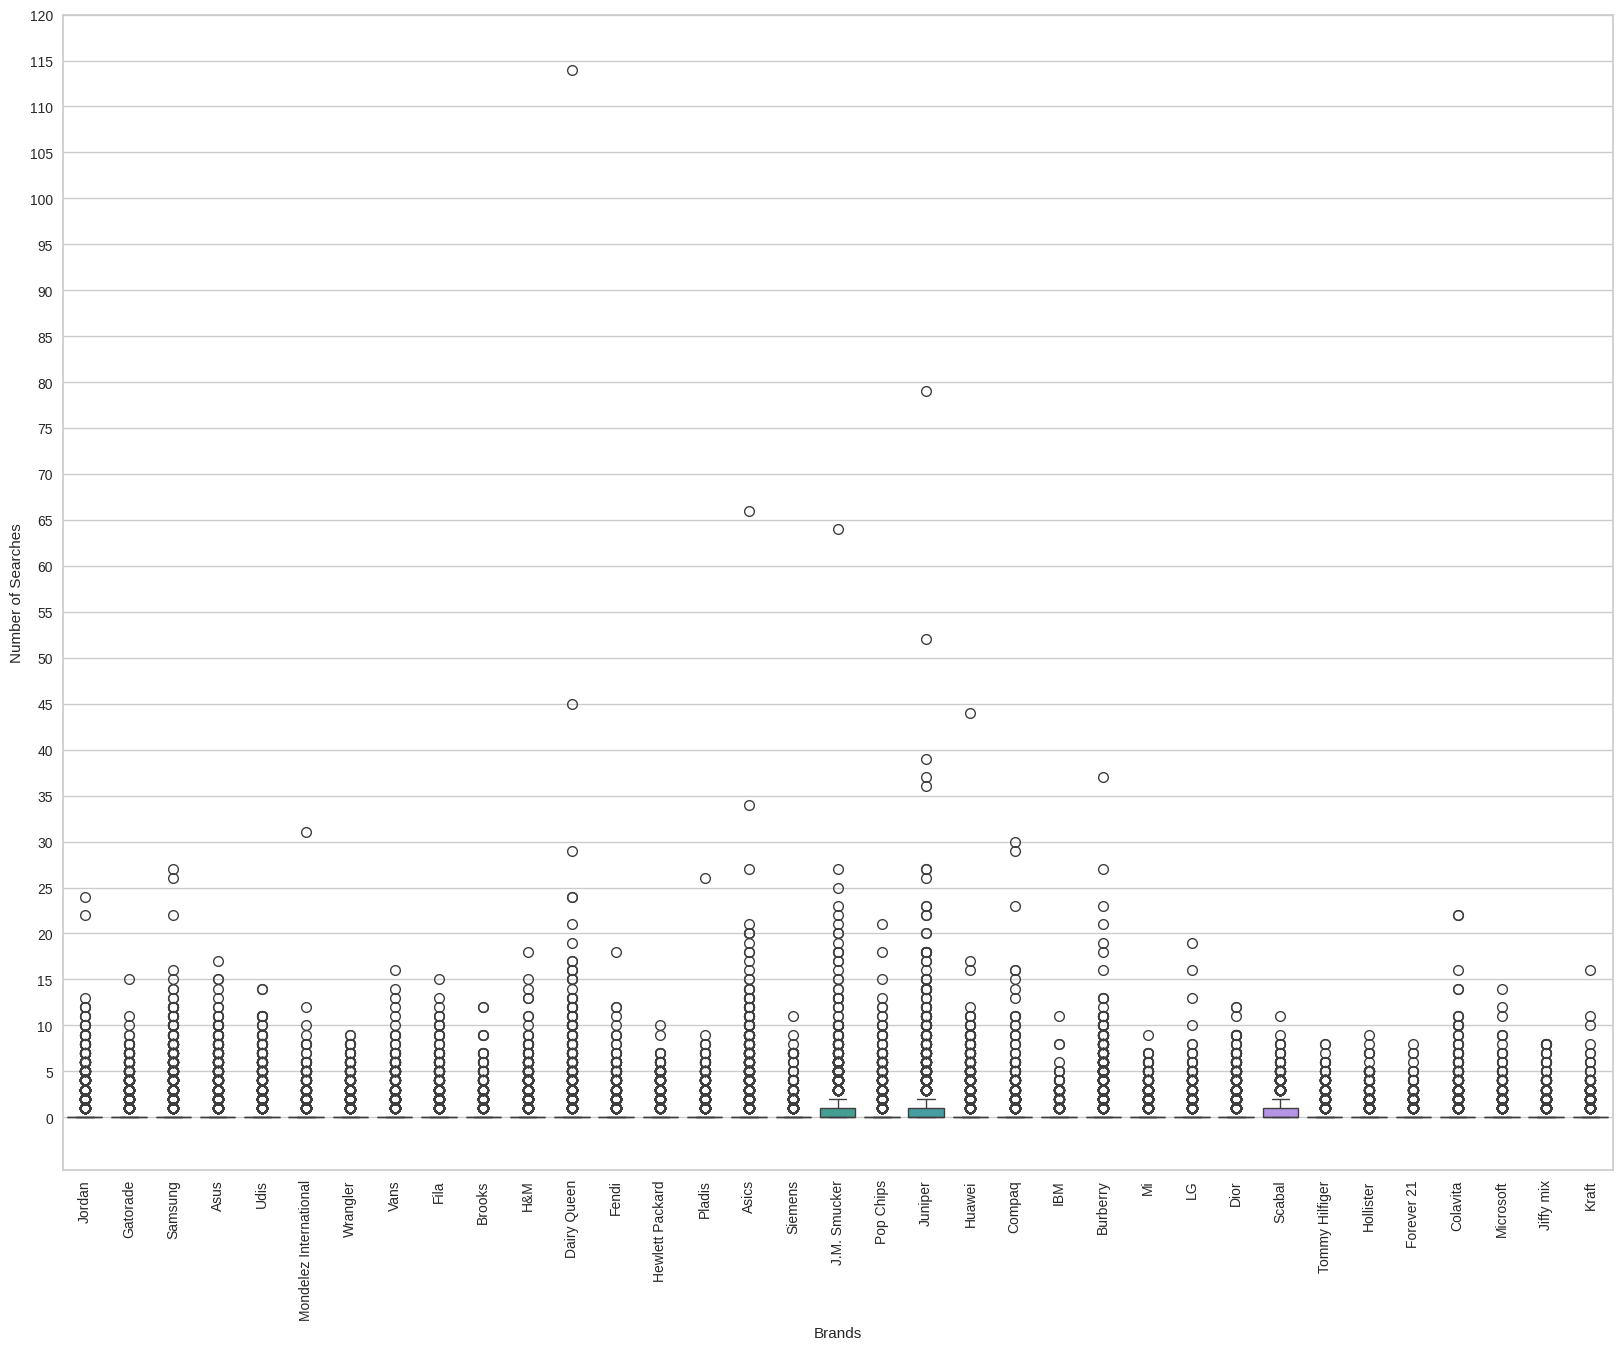

In [77]:
plt.figure(figsize=(20,15))
sns.boxplot(data=df.iloc[:,3:38])
plt.xlabel('Brands')
plt.xticks(rotation=90)
plt.ylabel('Number of Searches')
plt.yticks(np.arange(0,121,5))
plt.show()

In [78]:
df.iloc[:,3:38].corr()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
Jordan,1.000000,0.177254,0.071258,0.123731,0.135673,0.021950,0.040710,0.115796,0.031611,0.165471,0.038302,0.043857,0.030369,0.008800,0.062050,0.009816,-0.011082,0.054025,0.081462,0.025708,0.051468,0.007495,0.001963,0.096492,0.022963,0.070205,0.061185,0.062582,0.063739,0.026350,0.024710,0.015564,0.015804,0.021651,0.018918
Gatorade,0.177254,1.000000,0.063890,0.046215,0.058180,0.031272,0.088166,0.170620,0.026350,0.154345,0.066794,0.055532,0.029120,0.016680,0.062749,0.042912,0.006296,0.060775,0.087545,0.030956,0.042281,0.008773,-0.009290,0.102216,0.033103,0.066443,0.056571,0.045958,0.058190,0.050302,0.031495,0.018279,0.016625,0.038655,0.018553
Samsung,0.071258,0.063890,1.000000,0.012274,0.028785,0.035807,0.014565,0.029155,0.024847,0.089334,0.031444,0.014086,0.015095,0.011988,0.025422,0.004546,-0.011741,0.026365,0.048772,0.001621,0.024820,0.004358,-0.005467,0.047852,0.004060,0.058584,0.017369,0.046561,0.015502,0.021566,0.016170,0.005584,0.003640,0.009303,0.006633
Asus,0.123731,0.046215,0.012274,1.000000,0.114588,0.018120,0.026668,0.046990,-0.004766,0.114384,0.025349,0.028589,0.006580,0.006500,0.030216,0.010339,-0.000218,0.023046,0.022716,0.017840,0.033468,0.005892,-0.007446,0.047276,0.016904,0.025722,0.028911,0.043168,0.039139,0.017283,0.014186,0.009605,0.019748,0.008001,0.007530
Udis,0.135673,0.058180,0.028785,0.114588,1.000000,0.040251,0.023128,0.020696,0.021717,0.089850,0.037187,0.013806,0.011772,0.014293,0.022155,-0.008444,-0.014267,0.013708,0.020427,0.014118,0.024393,0.002922,-0.003076,0.040914,0.013516,0.030406,0.029567,0.068091,0.023367,0.032484,0.035360,0.000437,0.012679,0.004808,0.006795
Mondelez International,0.021950,0.031272,0.035807,0.018120,0.040251,1.000000,0.021211,0.020795,0.026681,0.039200,0.043001,0.022947,0.001657,0.012106,0.053772,0.018303,-0.002722,0.059322,0.031040,0.019580,0.021313,0.002441,0.000471,0.065318,0.011150,0.036895,0.034783,0.100657,0.056306,0.036270,0.044912,0.014344,0.013070,0.025066,0.019727
Wrangler,0.040710,0.088166,0.014565,0.026668,0.023128,0.021211,1.000000,0.028595,-0.002237,0.021861,0.070330,0.030978,0.024073,0.034098,0.040609,-0.002145,-0.010719,0.020302,0.043520,0.015098,0.030264,-0.000865,-0.006730,0.074666,0.024924,0.079583,0.054262,0.099995,0.045565,0.075141,0.066978,0.006188,0.008203,0.015954,0.014749
Vans,0.115796,0.170620,0.029155,0.046990,0.020696,0.020795,0.028595,1.000000,0.002731,0.122174,0.024992,0.031384,0.012768,0.002760,0.032070,-0.000852,-0.008563,0.030542,0.085626,0.010213,0.028003,0.015774,-0.003649,0.058406,-0.009476,0.073194,0.014776,-0.011961,0.021992,0.007039,0.002500,0.000045,-0.002454,0.008639,0.013326
Fila,0.031611,0.026350,0.024847,-0.004766,0.021717,0.026681,-0.002237,0.002731,1.000000,0.046930,0.010780,0.007973,-0.000600,-0.004208,0.017112,0.030645,-0.003690,0.031718,0.025974,0.009153,0.023757,0.001063,-0.004363,0.025138,0.006529,0.019730,0.001074,0.021368,0.014916,0.016579,0.032152,0.001512,0.006447,0.003933,0.005414
Brooks,0.165471,0.154345,0.089334,0.114384,0.089850,0.039200,0.021861,0.122174,0.046930,1.000000,0.023054,0.085054,0.029174,0.007570,0.121461,0.028050,-0.010455,0.122213,0.099326,0.039703,0.026713,0.003871,-0.001441,0.168292,0.018003,0.053219,0.030597,0.027999,0.073666,0.034223,0.052320,0.051175,0.033545,0.061100,0.086964


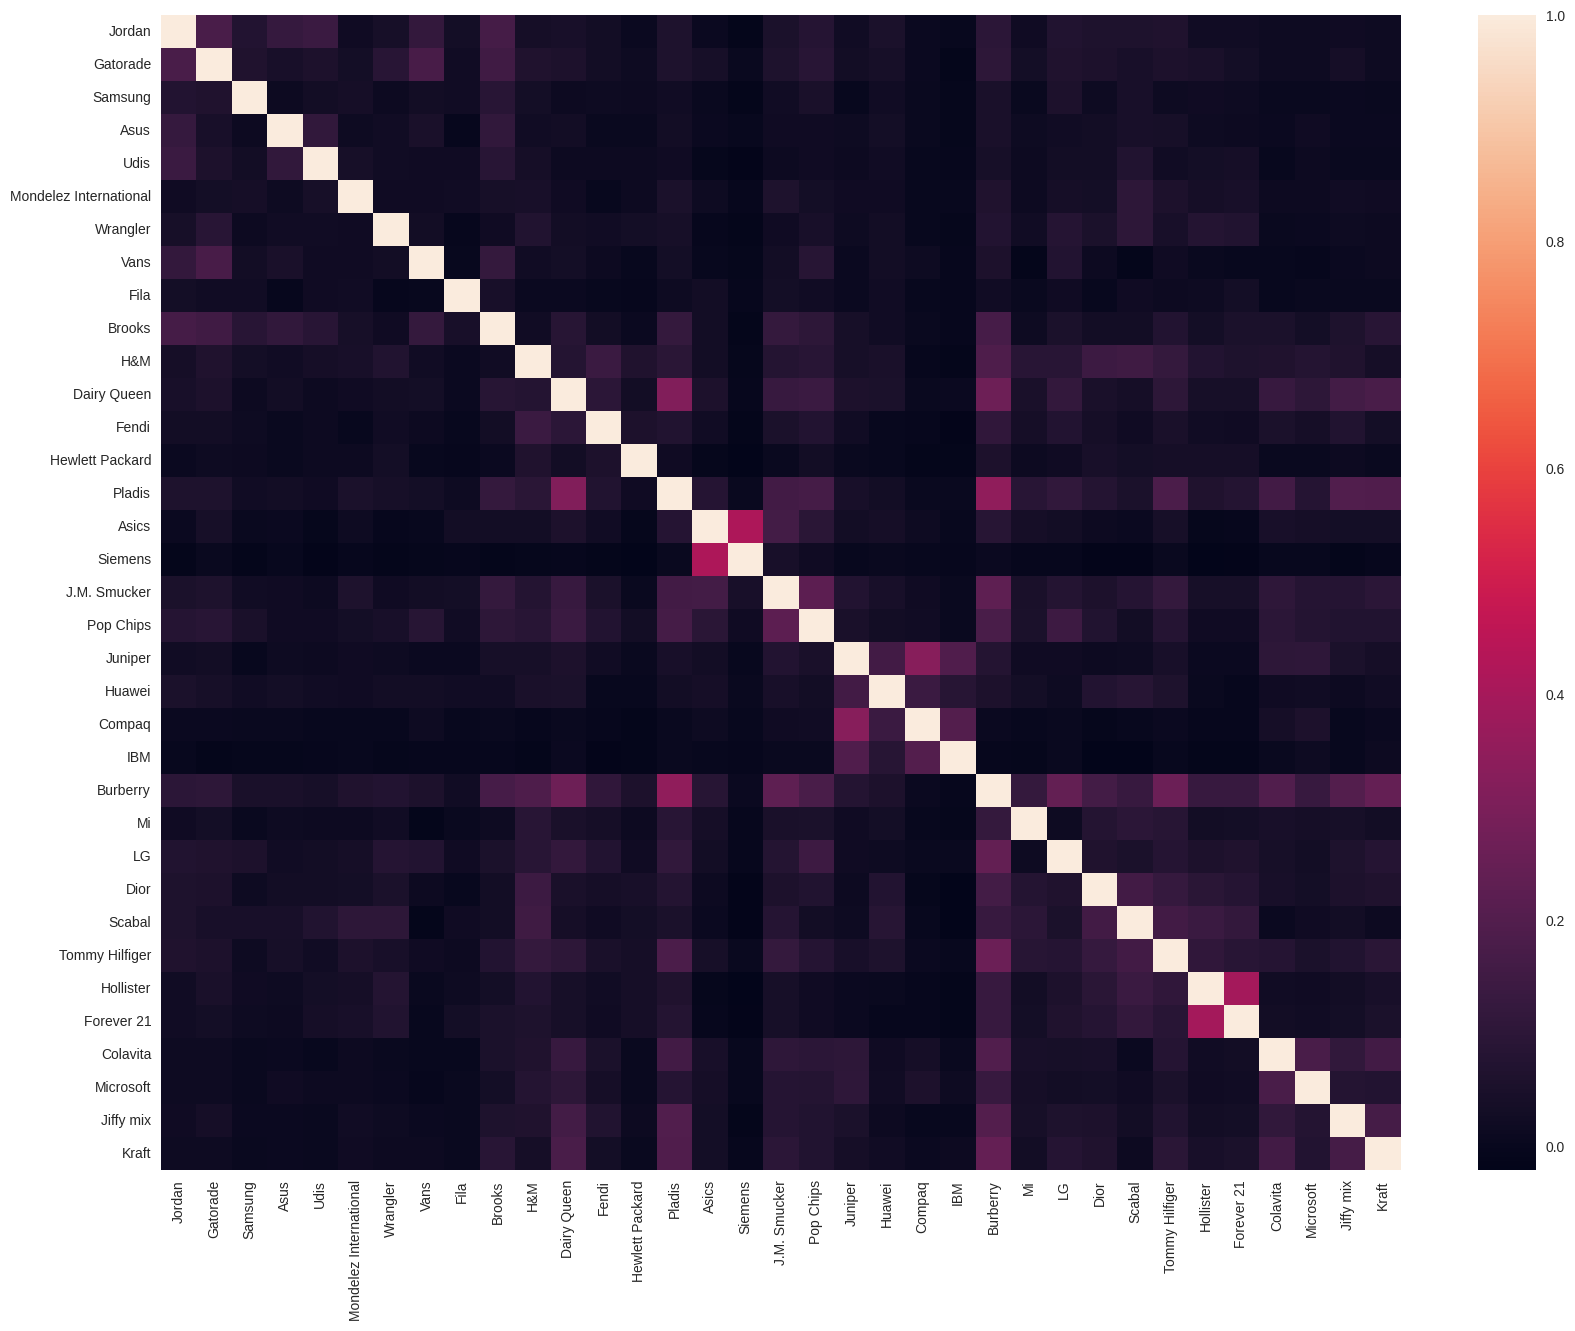

In [79]:
plt.figure(figsize=(20,15))
sns.heatmap(data=df.iloc[:,3:38].corr())
plt.show()

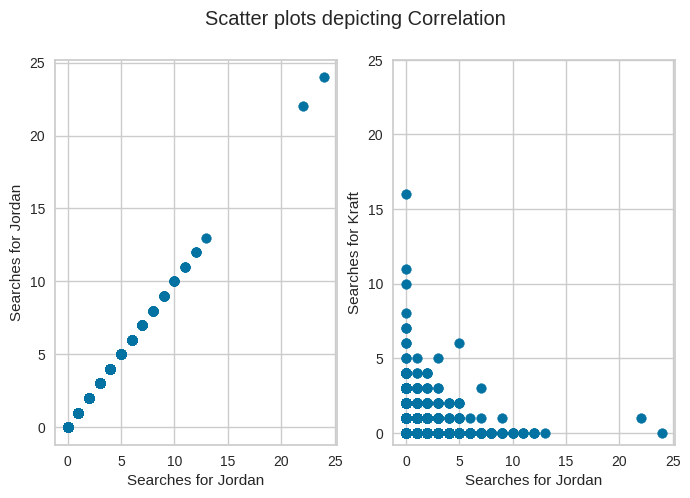

In [80]:
fig,ax=plt.subplots(1,2,figsize=(8,5))
ax[0].scatter(df.Jordan,df.Jordan)
ax[0].set_xlabel('Searches for Jordan')
ax[0].set_ylabel('Searches for Jordan')
ax[0].set_yticks(np.arange(0,26,5))

ax[1].scatter(df.Jordan,df.Kraft)
ax[1].set_xlabel('Searches for Jordan')
ax[1].set_ylabel('Searches for Kraft')
ax[1].set_yticks(np.arange(0,26,5))
fig.suptitle('Scatter plots depicting Correlation')
plt.show()

In [81]:
print(df.iloc[:,3:38].shape[1],"brands are avaliable.")

35 brands are avaliable.


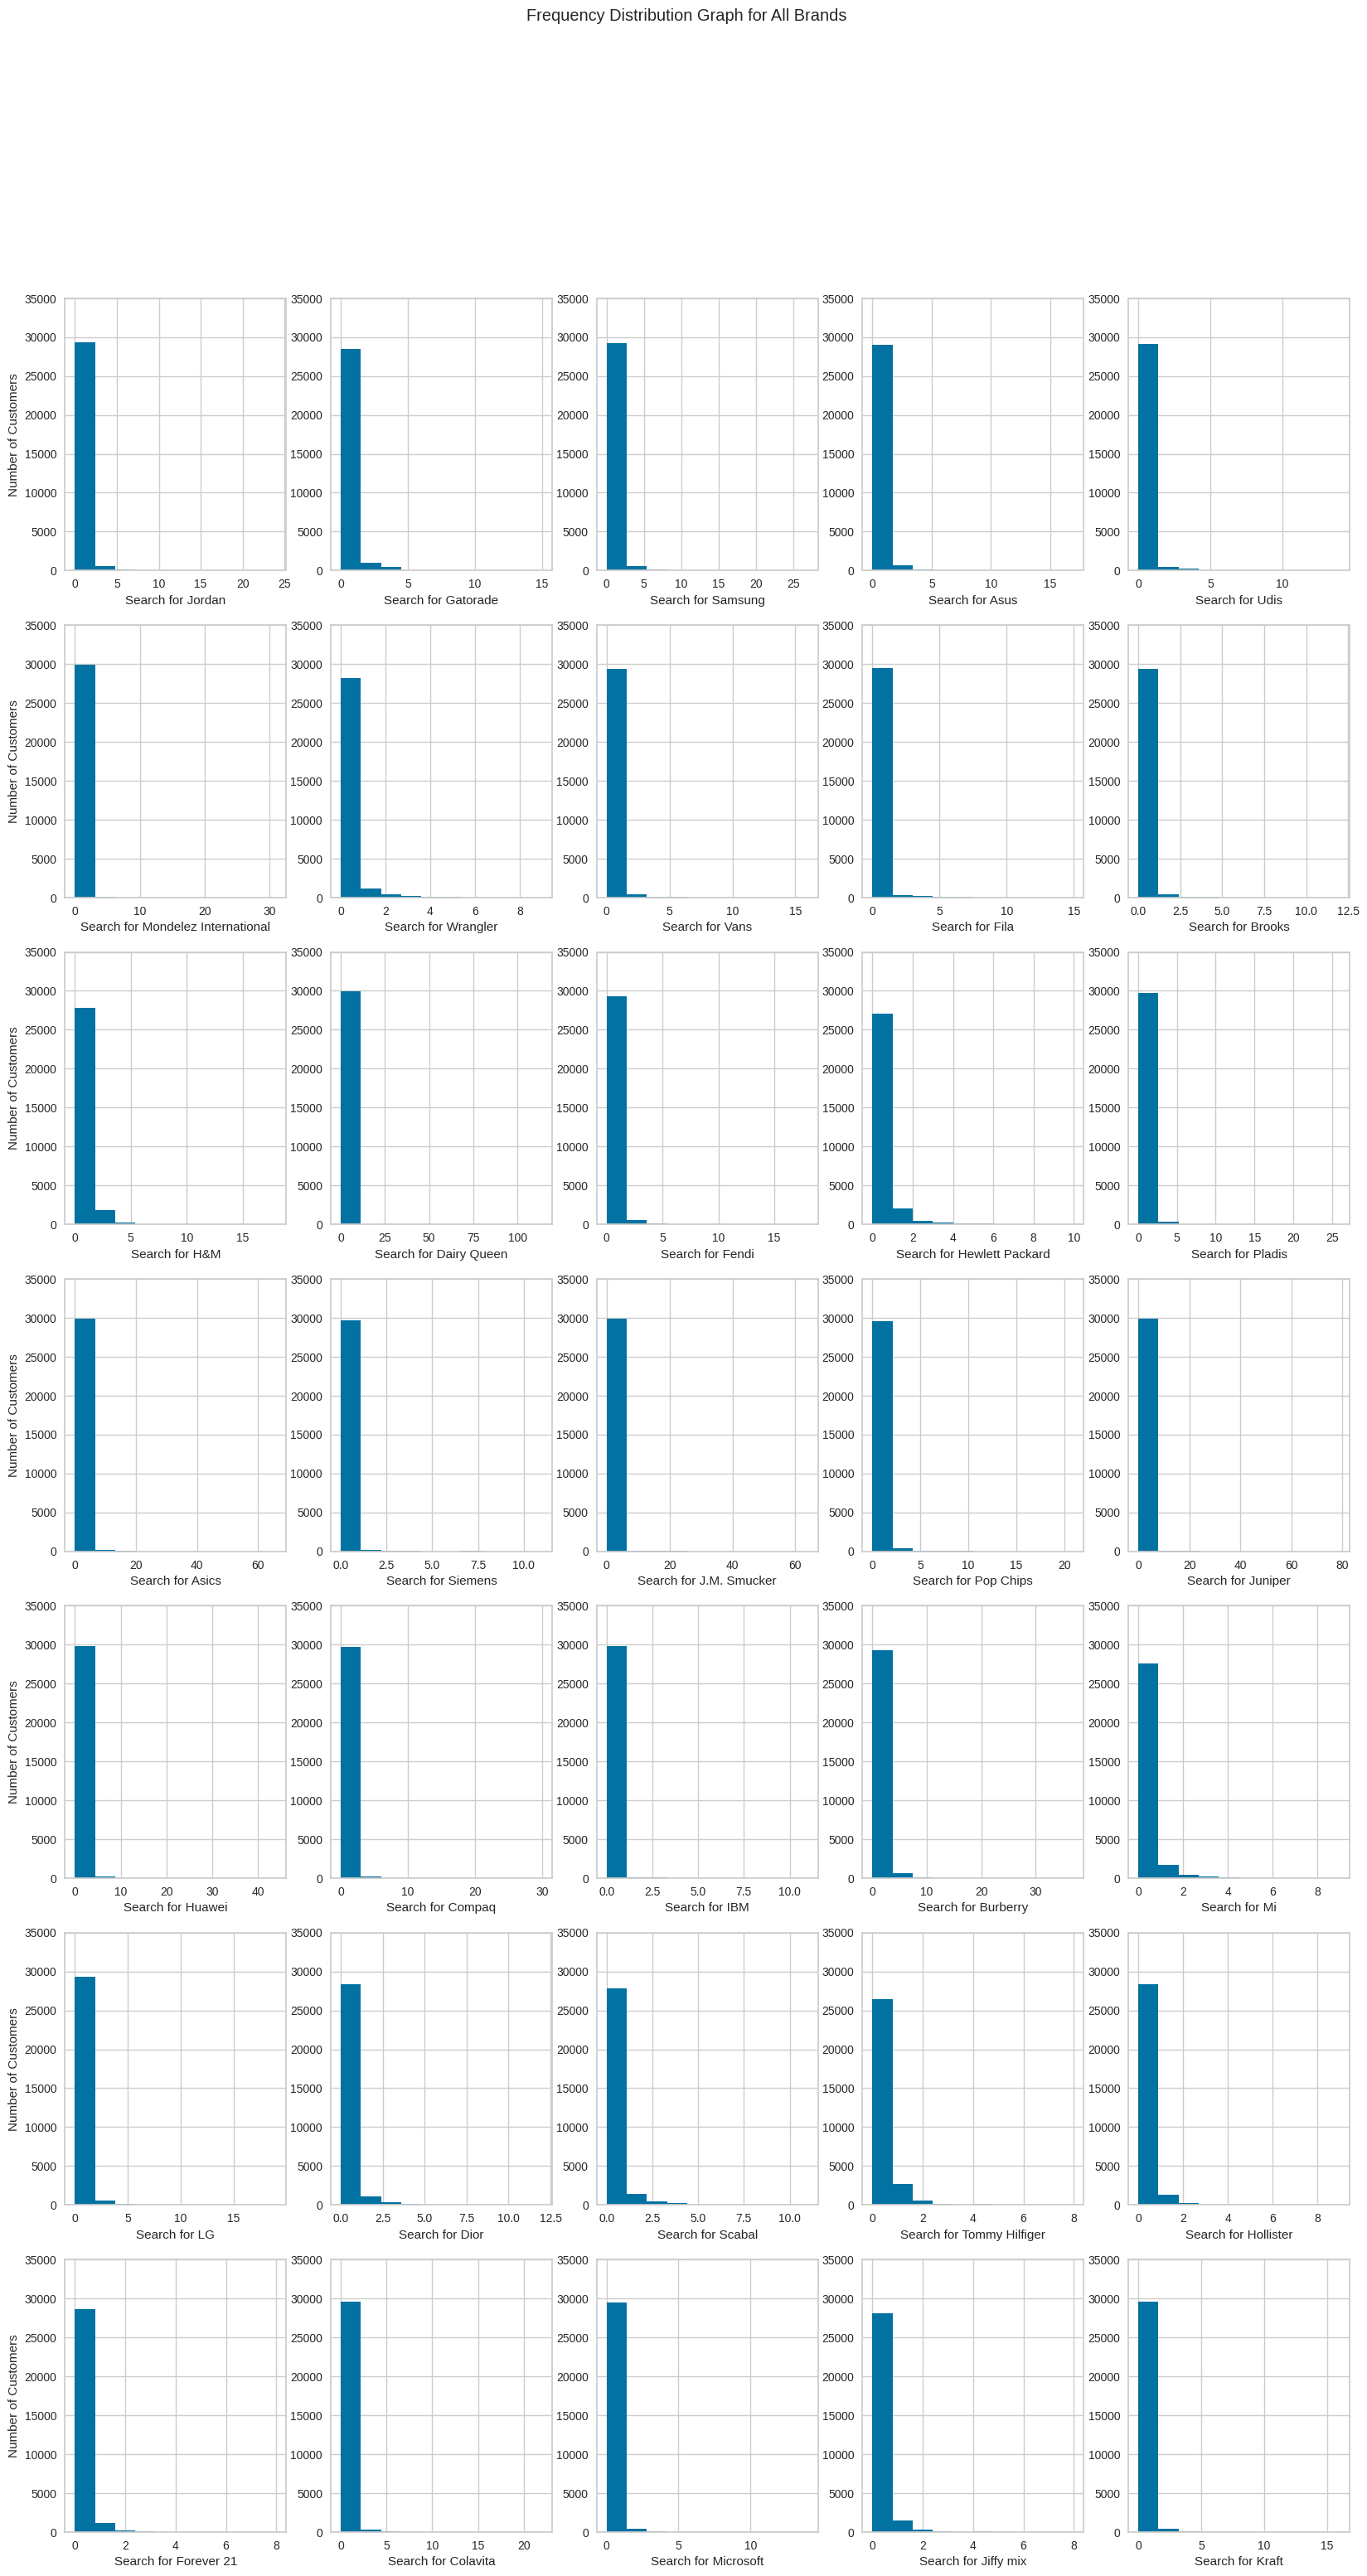

In [82]:
fig,ax=plt.subplots(7,5,figsize=(20, 35))
column=list(df.iloc[:,3:38].columns)
i=0
for row in range(0,7):
    ax[row,0].set_ylabel("Number of Customers")
    for col in range(0,5):
        ax[row,col].hist(df[column[i]])
        ax[row,col].set_xlabel("Search for "+column[i])
        ax[row,col].set_yticks(np.arange(0,40000,5000))
        i=i+1
fig.suptitle('Frequency Distribution Graph for All Brands')
plt.show()

##### Understanding of Total_Searches Column

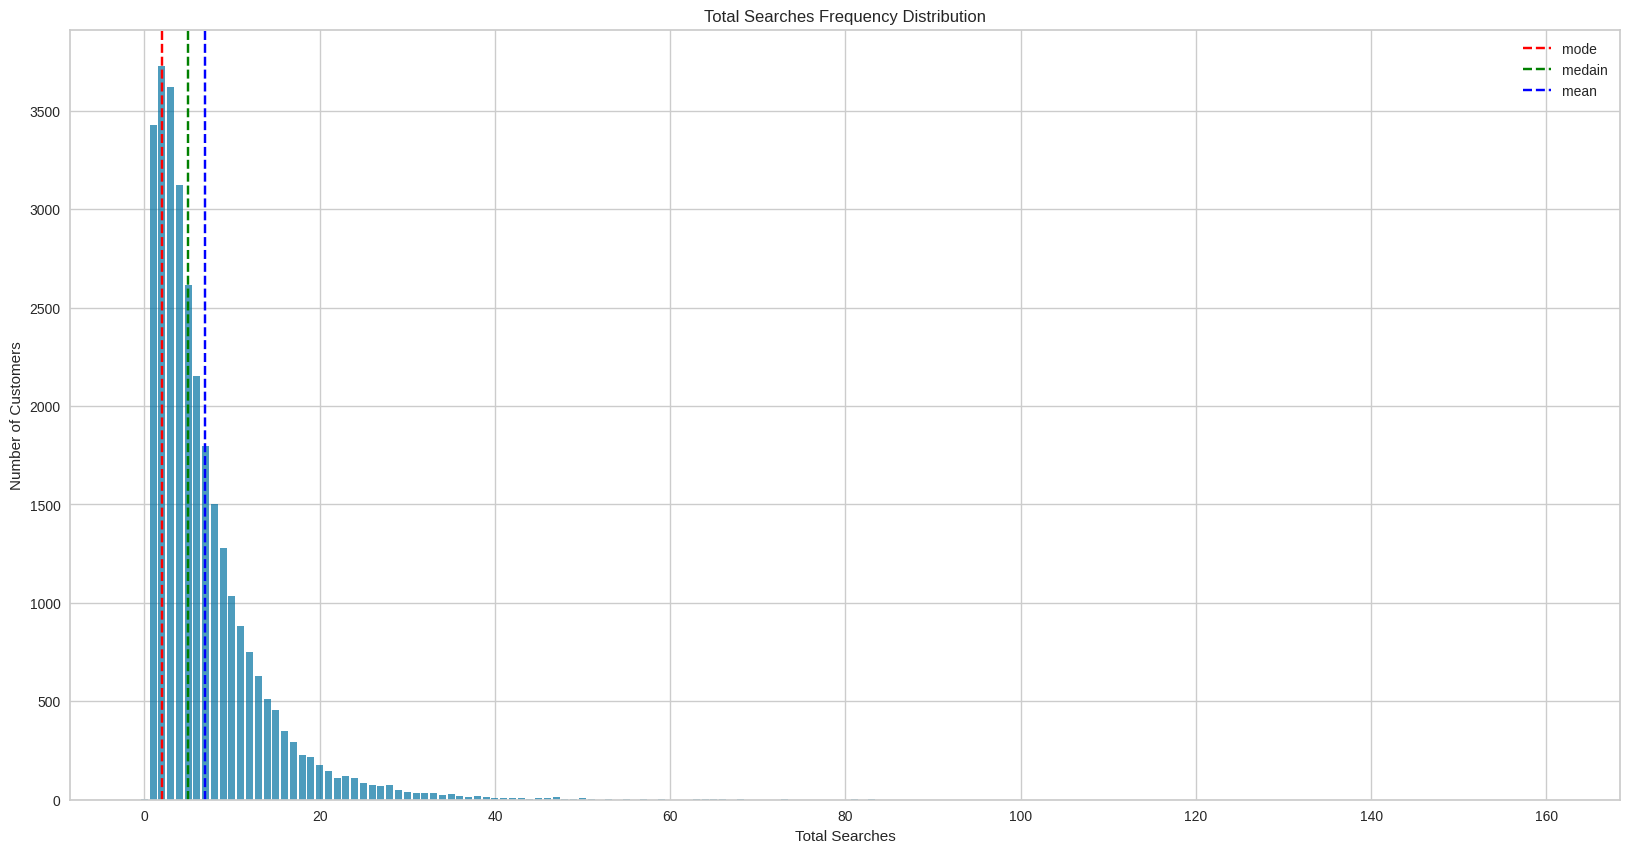

In [83]:
plt.figure(figsize=(20,10))
plt.bar(df.Total_Searches.value_counts().index,df.Total_Searches.value_counts().values,alpha=0.7)
plt.axvline(x=df.Total_Searches.mode()[0], color='red', linestyle='--',label='mode')
plt.axvline(x=np.median(df.Total_Searches), color='green', linestyle='--',label='medain')
plt.axvline(x=np.mean(df.Total_Searches), color='blue', linestyle='--',label='mean')
plt.xlabel('Total Searches')
plt.ylabel('Number of Customers')
plt.title('Total Searches Frequency Distribution')
plt.legend()
plt.show()

In [84]:
df.Total_Searches.value_counts()[(df.Total_Searches.value_counts().index>=40)&(df.Total_Searches.value_counts().index<=160)]

Total_Searches
47     12
43     10
41     10
42     10
40      9
45      8
46      7
50      7
55      4
53      3
44      3
66      3
49      3
57      3
64      3
48      3
63      2
59      2
65      2
51      2
83      2
68      2
81      2
73      2
52      1
85      1
79      1
96      1
70      1
76      1
136     1
69      1
60      1
71      1
74      1
98      1
58      1
61      1
160     1
109     1
54      1
127     1
87      1
Name: count, dtype: int64

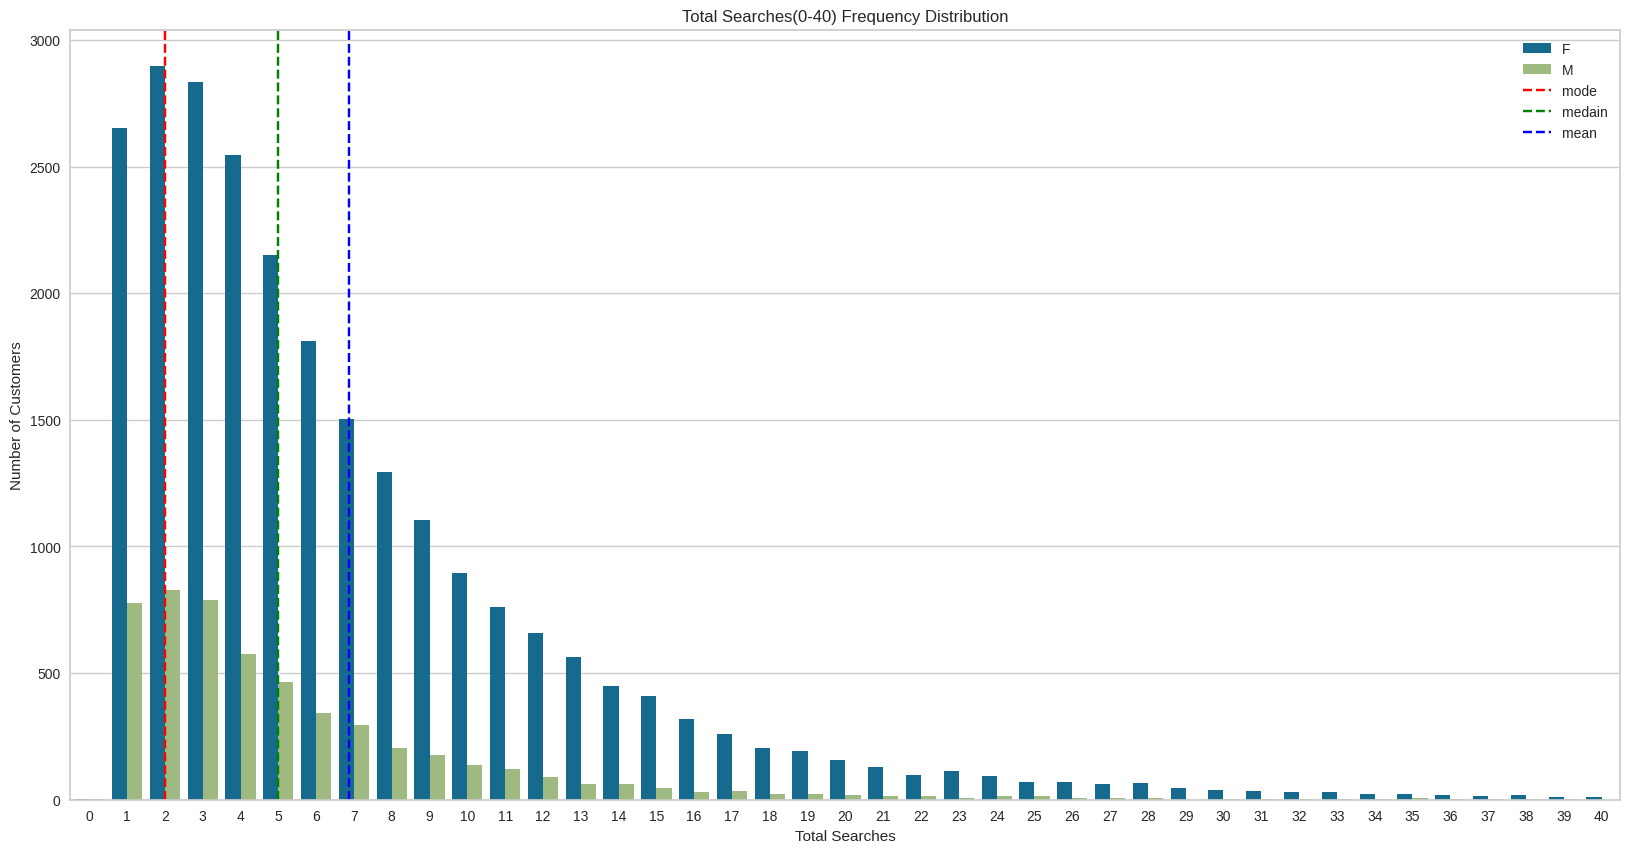

In [85]:
plt.figure(figsize=(20,10))
sns.countplot(data=df[(df.Total_Searches>=0)&(df.Total_Searches<=40)],x='Total_Searches',hue='Gender')
plt.axvline(x=df.Total_Searches.mode()[0], color='red', linestyle='--',label='mode')
plt.axvline(x=np.median(df.Total_Searches), color='green', linestyle='--',label='medain')
plt.axvline(x=np.mean(df.Total_Searches), color='blue', linestyle='--',label='mean')
plt.xlabel('Total Searches')
plt.ylabel('Number of Customers')
plt.title('Total Searches(0-40) Frequency Distribution')
plt.legend()
plt.show()

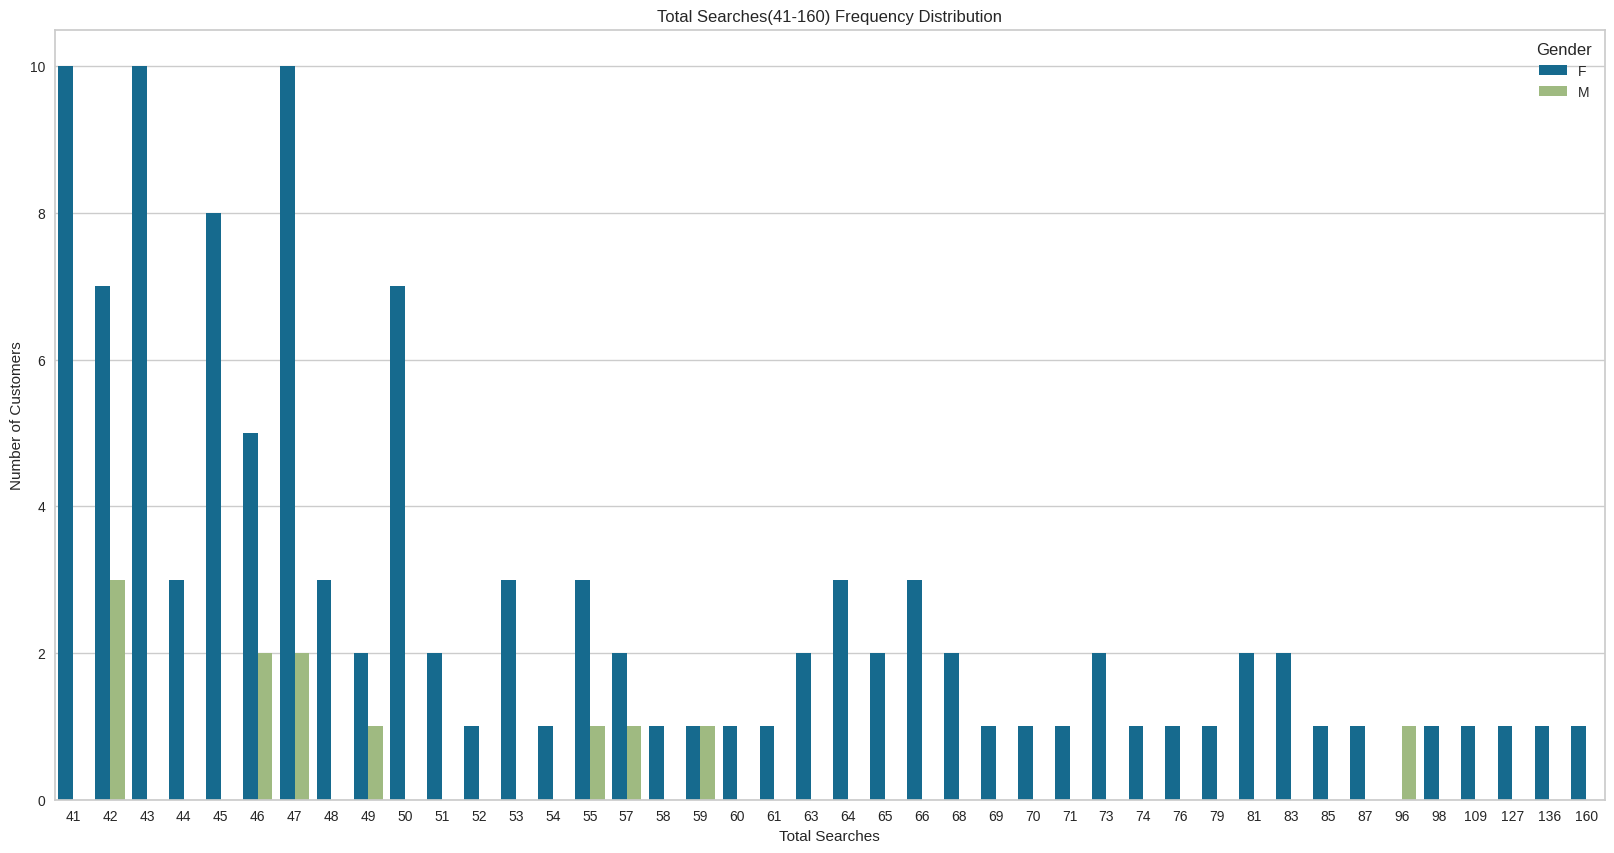

In [86]:
plt.figure(figsize=(20,10))
sns.countplot(data=df[(df.Total_Searches>=41)&(df.Total_Searches<=160)],x='Total_Searches',hue='Gender')
plt.xlabel('Total Searches')
plt.ylabel('Number of Customers')
plt.title('Total Searches(41-160) Frequency Distribution')
plt.show()

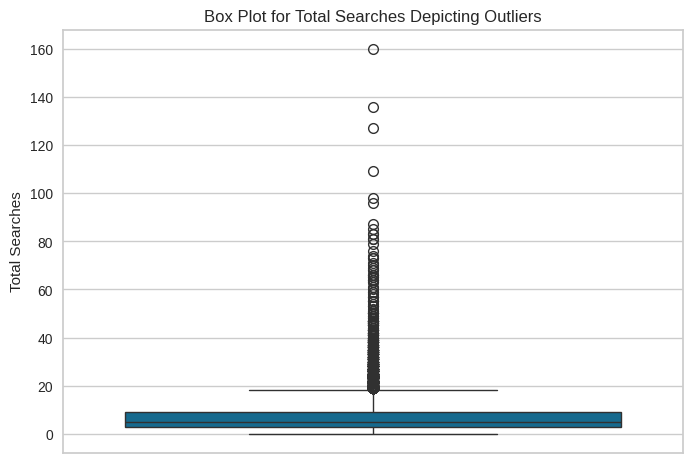

In [87]:
sns.boxplot(df.Total_Searches)
plt.ylabel('Total Searches')
plt.title('Box Plot for Total Searches Depicting Outliers')
plt.show()

##### Accessing potentially high valued Customers

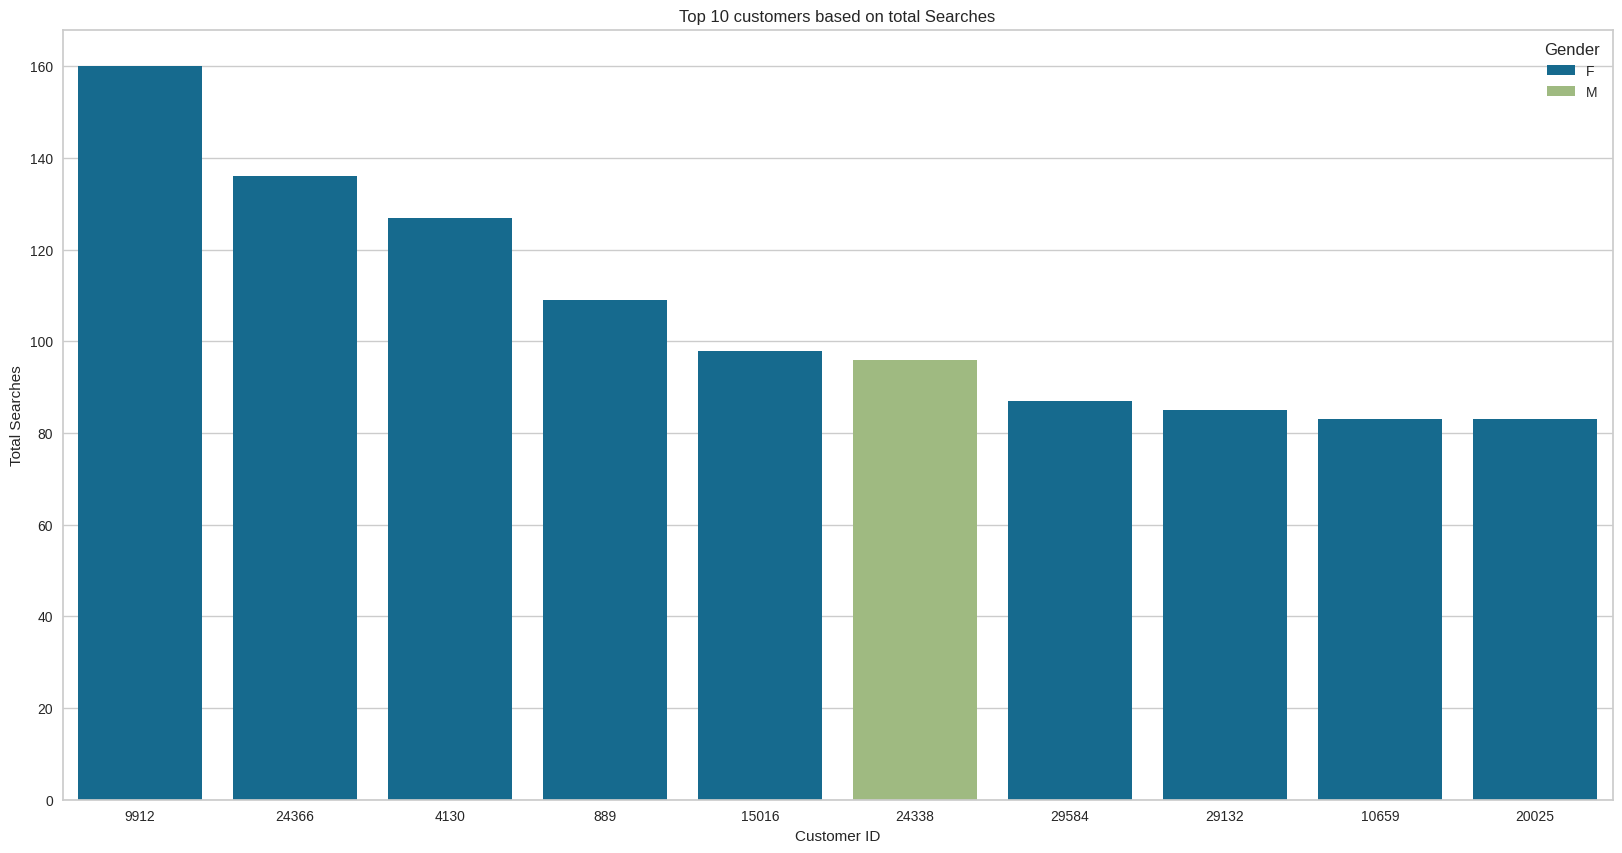

In [88]:
plt.figure(figsize=(20,10))
sns.barplot(data=df.sort_values('Total_Searches',ascending=False).head(10),x='Cust_ID',y='Total_Searches',hue='Gender',order=df.sort_values('Total_Searches',ascending=False).head(10).Cust_ID)
plt.xlabel('Customer ID')
plt.ylabel('Total Searches')
plt.title('Top 10 customers based on total Searches')
plt.show()

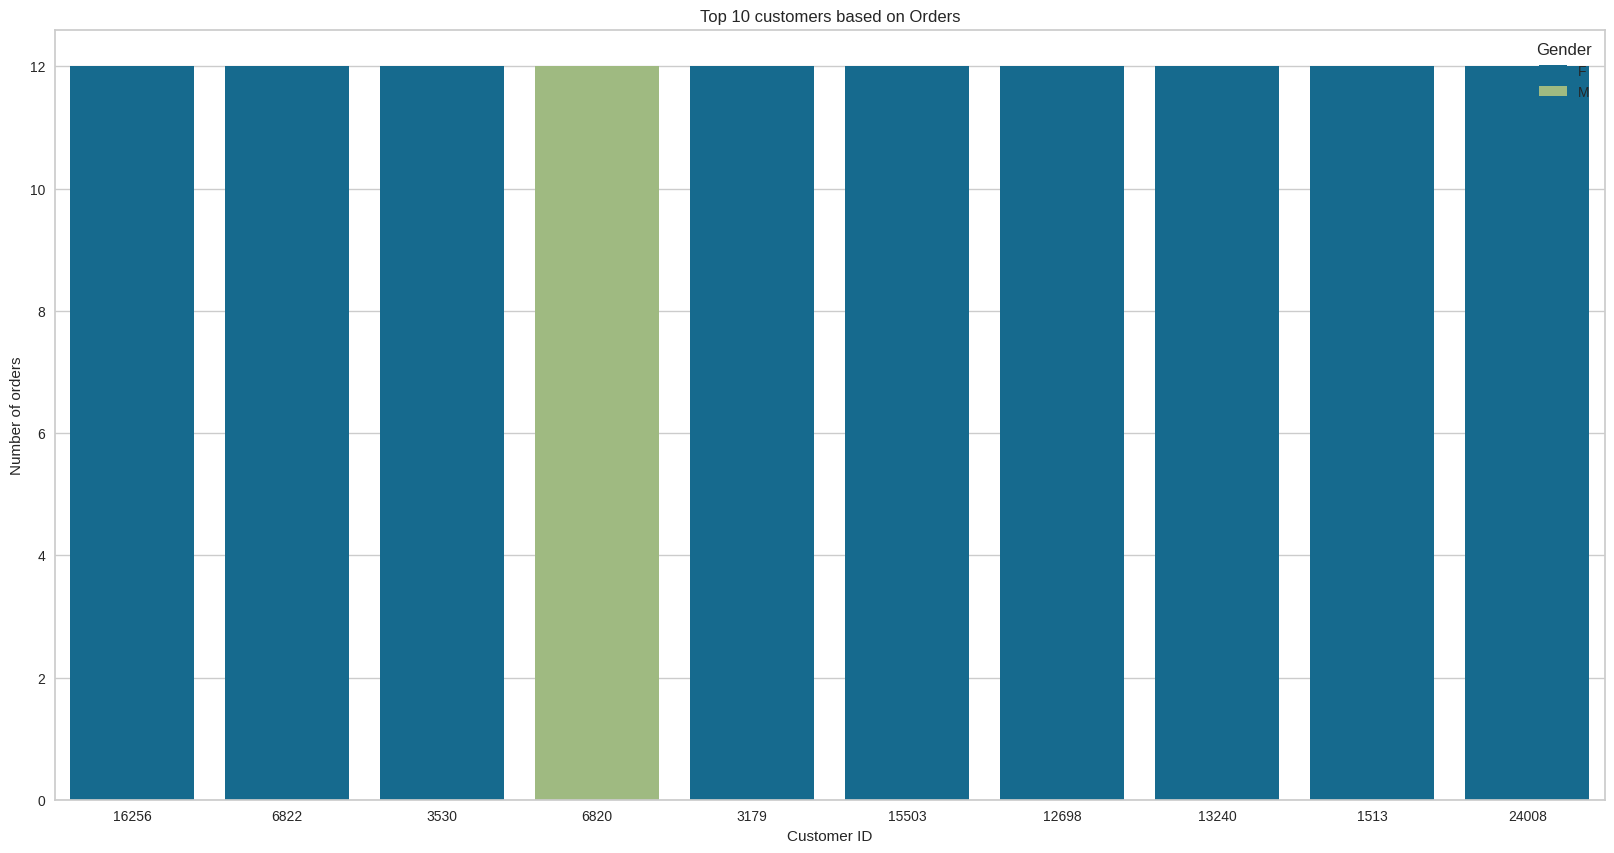

In [89]:
plt.figure(figsize=(20,10))
sns.barplot(data=df.sort_values('Orders',ascending=False).head(10),x='Cust_ID',y='Orders',hue='Gender',order=df.sort_values('Orders',ascending=False).head(10).Cust_ID)
plt.xlabel('Customer ID')
plt.ylabel('Number of orders')
plt.title('Top 10 customers based on Orders')
plt.show()

#### Data Normalization

In [90]:
features=df.iloc[:,2:38].values
scaler=MinMaxScaler()
scaled_features=scaler.fit_transform(features)
scaled_features

array([[0.58333333, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.06666667, ..., 0.        , 0.        ,
        0.        ],
       [0.58333333, 0.        , 0.06666667, ..., 0.07142857, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.06666667, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.25      , 0.08333333, 0.        , ..., 0.        , 0.        ,
        0.        ]])

### Determining No of Clusters (k-value)

In [91]:
inertia=[]
for k in range(1,16):
  kmeansModel=KMeans(n_clusters=k)
  kmeansModel=kmeansModel.fit(scaled_features)
  inertia.append(kmeansModel.inertia_)
inertia

[4257.854829903177,
 2161.780171829231,
 1826.548612886806,
 1711.676039593033,
 1659.206845860746,
 1622.340181459876,
 1579.4876963676943,
 1531.2701049395087,
 1513.140429442343,
 1471.231102981444,
 1444.5466355295107,
 1420.8967599798943,
 1397.4464360337188,
 1379.0893010585248,
 1362.664839678119]

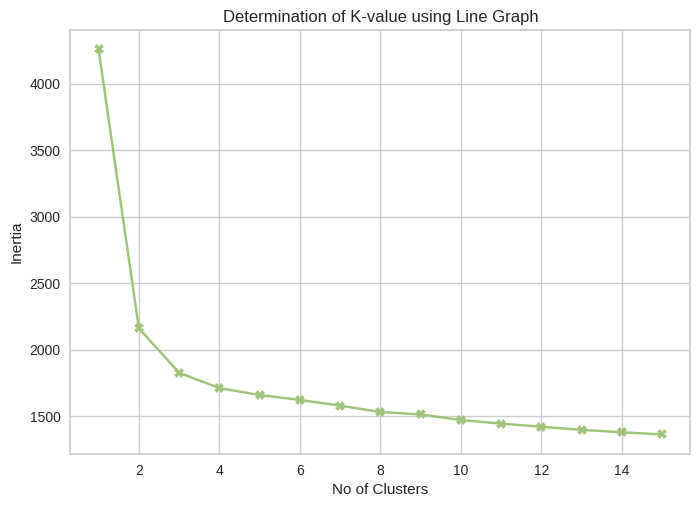

In [92]:
plt.plot(np.arange(1,16),inertia,'gX-')
plt.xlabel('No of Clusters')
plt.ylabel('Inertia')
plt.title('Determination of K-value using Line Graph')
plt.show()

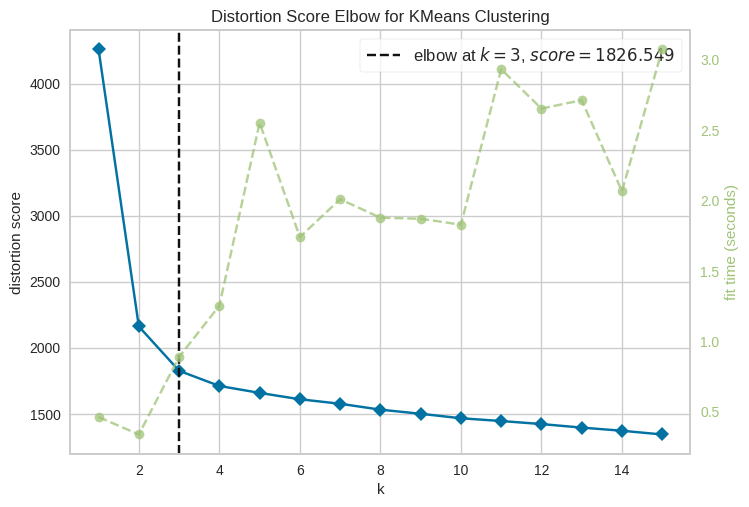

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [93]:
kmeansModel=KMeans()
visualiazer=KElbowVisualizer(kmeansModel,k=(1,16))
visualiazer.fit(scaled_features)
visualiazer.poof()

#### Silhouette score Analysis

In [94]:
silhouette_score_lst=[]
for k in range(2,16):
  kmeansModel=KMeans(n_clusters=k)
  cluster_labels=kmeansModel.fit_predict(scaled_features)
  silhouette_score_lst.append(silhouette_score(scaled_features,cluster_labels))
silhouette_score_lst

[0.4322911388133001,
 0.2926824214520362,
 0.20970481391470447,
 0.22965846653026942,
 0.17328538286118503,
 0.16399045790661607,
 0.14104855474408734,
 0.1610851728658748,
 0.1830070716504608,
 0.14766592733374312,
 0.12136234735484429,
 0.17674734070880554,
 0.1247829870561935,
 0.14834249264983715]

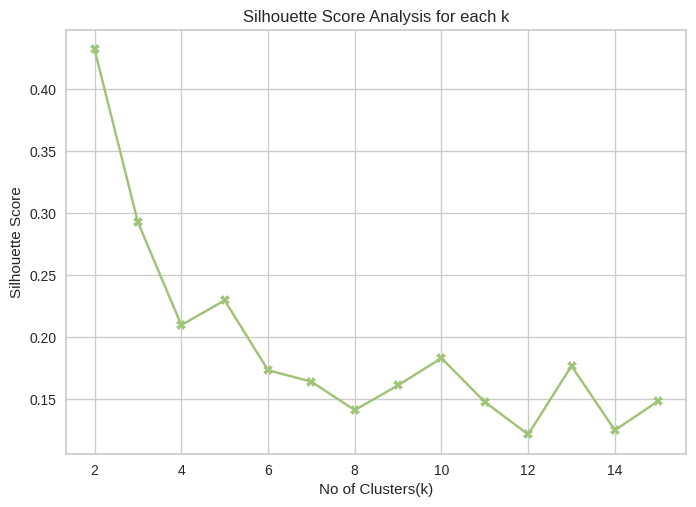

In [95]:
plt.plot(np.arange(2,16),silhouette_score_lst,'gX-')
plt.xlabel('No of Clusters(k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis for each k')
plt.show()

## Applying K-Means Clustering

In [96]:
kmeansModel=KMeans(n_clusters=3)
kmeansModel=kmeansModel.fit(scaled_features)
cluster_labels=kmeansModel.predict(scaled_features)
centroids=kmeansModel.cluster_centers_

In [97]:
cluster_labels

array([1, 2, 1, ..., 2, 2, 0], dtype=int32)

In [98]:
centroids

array([[0.37173183, 0.01206556, 0.0185703 , 0.00897841, 0.01000836,
        0.01049425, 0.00479667, 0.01246709, 0.00711641, 0.00595577,
        0.01137441, 0.01906266, 0.00177725, 0.00818852, 0.01592417,
        0.00422439, 0.00507145, 0.00437312, 0.01218528, 0.01187091,
        0.00622713, 0.00632001, 0.00388231, 0.00311288, 0.01215576,
        0.0138099 , 0.00490771, 0.02256122, 0.03442482, 0.01944609,
        0.0092812 , 0.00746445, 0.00877316, 0.00895396, 0.01147808,
        0.00445053],
       [0.72930361, 0.01144829, 0.01822232, 0.008606  , 0.01017554,
        0.01063447, 0.00458002, 0.01190476, 0.00729212, 0.00590126,
        0.01248904, 0.01982301, 0.00175861, 0.00832603, 0.01675066,
        0.00394391, 0.00479709, 0.00485021, 0.01240346, 0.01255165,
        0.00578135, 0.0059059 , 0.00411554, 0.00256952, 0.01176363,
        0.01404713, 0.00532774, 0.02305178, 0.03522628, 0.02022623,
        0.00845993, 0.00694292, 0.00891861, 0.00856079, 0.01144829,
        0.00416301],
      

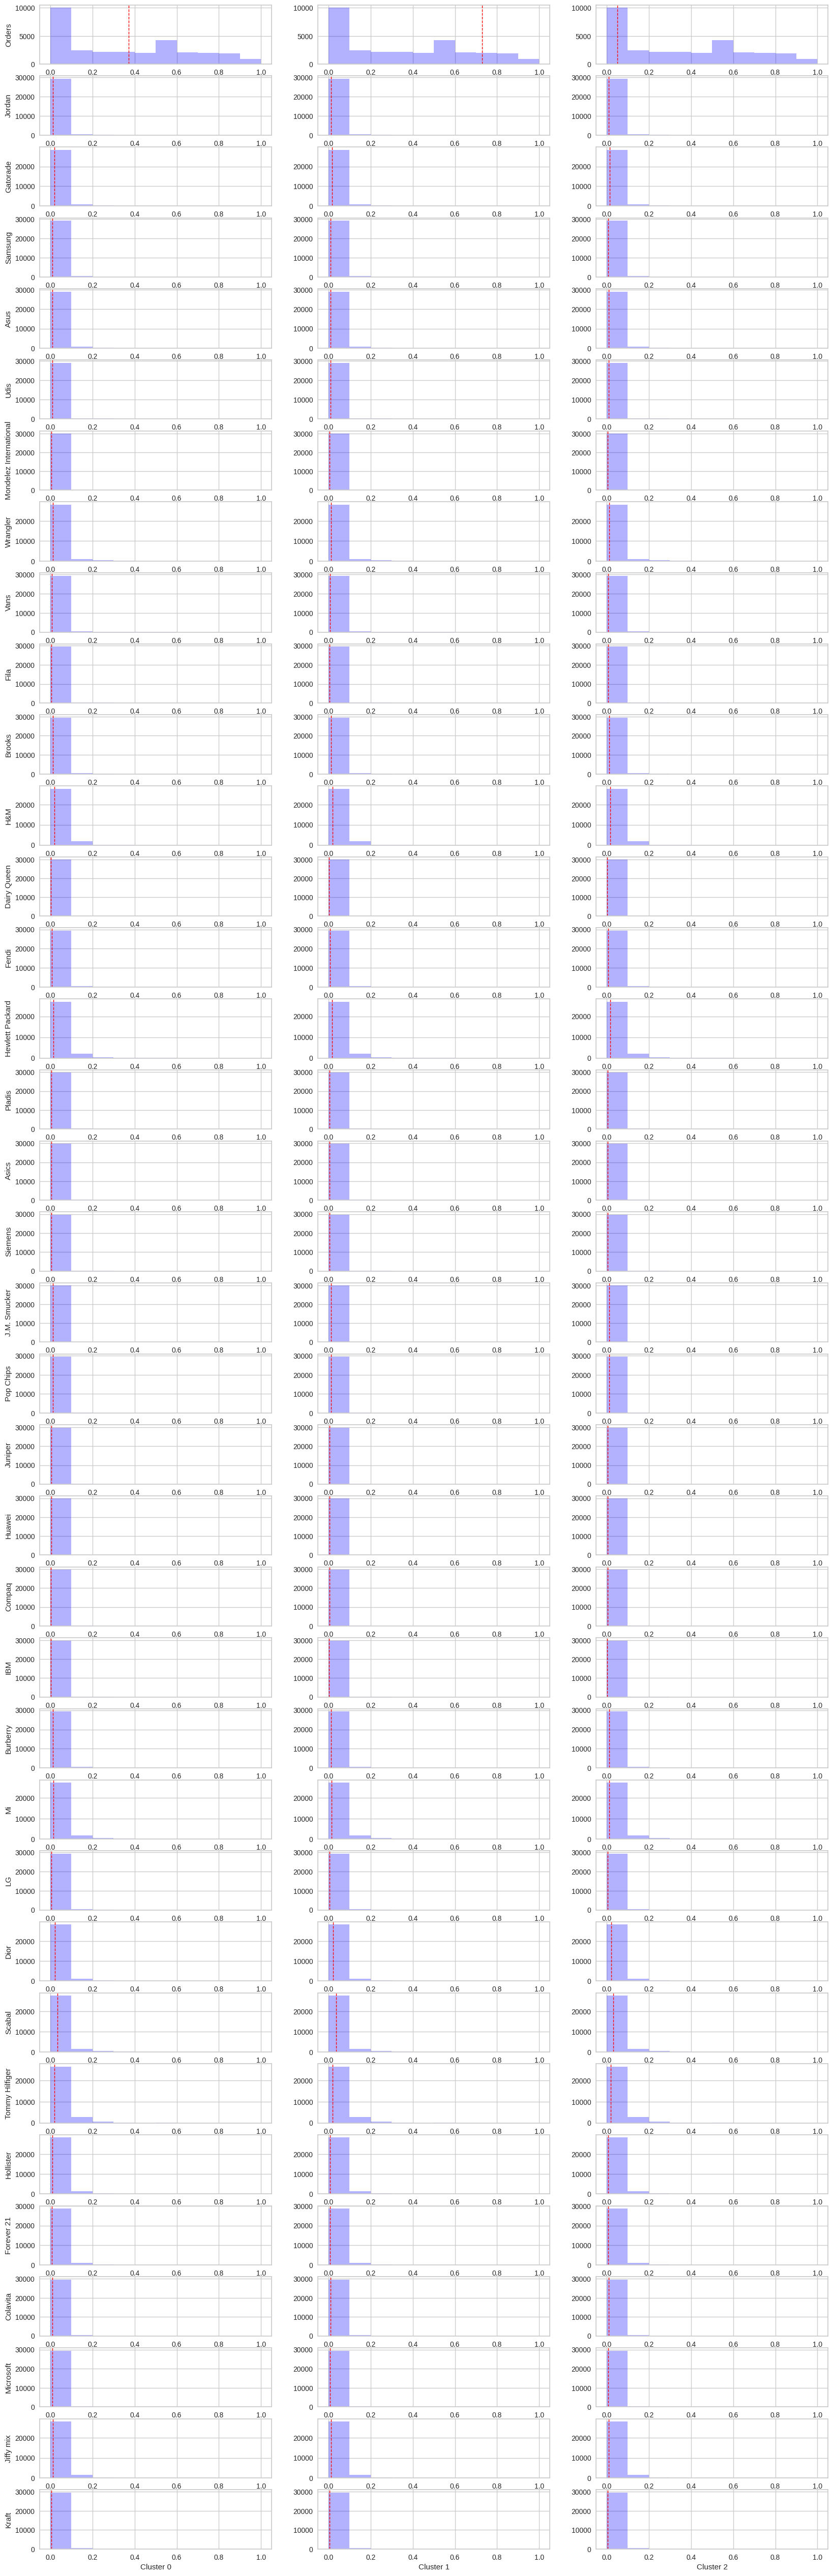

In [99]:
fig,ax=plt.subplots(36,3,figsize=(20, 65))
columns=df.columns
i=-1
for row in range(0,36):
  i+=1
  lst=[l[i] for l in scaled_features]
  ax[row,0].set_ylabel(columns[i+2])
  for col in range(0,3):
    ax[row,col].hist(lst,bins=10,alpha=0.3,color='blue')
    ax[row,col].axvline(x=centroids[col][i], color='red', linestyle='--', linewidth=1)
    if(row==35):
      ax[row,col].set_xlabel('Cluster '+str(col))
plt.show()

In [100]:
df['Cluster_labels']=pd.DataFrame({'Cluster_labels':cluster_labels})
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total_Searches,Cluster_labels
0,1,M,7,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1
1,2,F,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0,18,2
2,3,M,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1
3,4,F,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2
4,5,F,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1,16,1


In [101]:
df.to_csv("Customer_data_with_clusters",index=False)

## Analyzing Clusters (based on Univariate Analysis)

#### Analysis based on Cust_ID column

In [102]:
df.Cluster_labels.value_counts()

Cluster_labels
2    12432
1     9128
0     8440
Name: count, dtype: int64

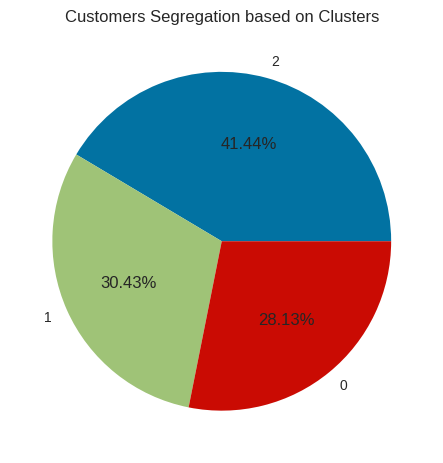

In [103]:
plt.pie(df.Cluster_labels.value_counts().values,labels=df.Cluster_labels.value_counts().index,autopct='%1.2f%%')
plt.title('Customers Segregation based on Clusters')
plt.show()

#### Analysis based on Gender Column

In [104]:
print("Cluster 0")
print("Male",df[(df.Gender=='M')&(df.Cluster_labels==0)].shape[0])
print("Female",df[(df.Gender=='F')&(df.Cluster_labels==0)].shape[0])
print("Cluster 1")
print("Male",df[(df.Gender=='M')&(df.Cluster_labels==1)].shape[0])
print("Female",df[(df.Gender=='F')&(df.Cluster_labels==1)].shape[0])
print("Cluster 2")
print("Male",df[(df.Gender=='M')&(df.Cluster_labels==2)].shape[0])
print("Female",df[(df.Gender=='F')&(df.Cluster_labels==2)].shape[0])

Cluster 0
Male 1532
Female 6908
Cluster 1
Male 1620
Female 7508
Cluster 2
Male 2070
Female 10362


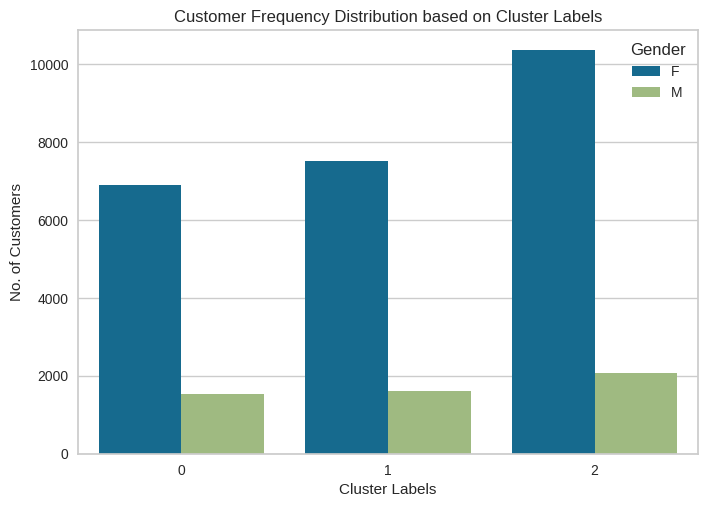

In [105]:
sns.countplot(data=df,x='Cluster_labels',hue='Gender')
plt.xlabel('Cluster Labels')
plt.ylabel('No. of Customers')
plt.title('Customer Frequency Distribution based on Cluster Labels')
plt.show()

#### Analysis based on Orders Column

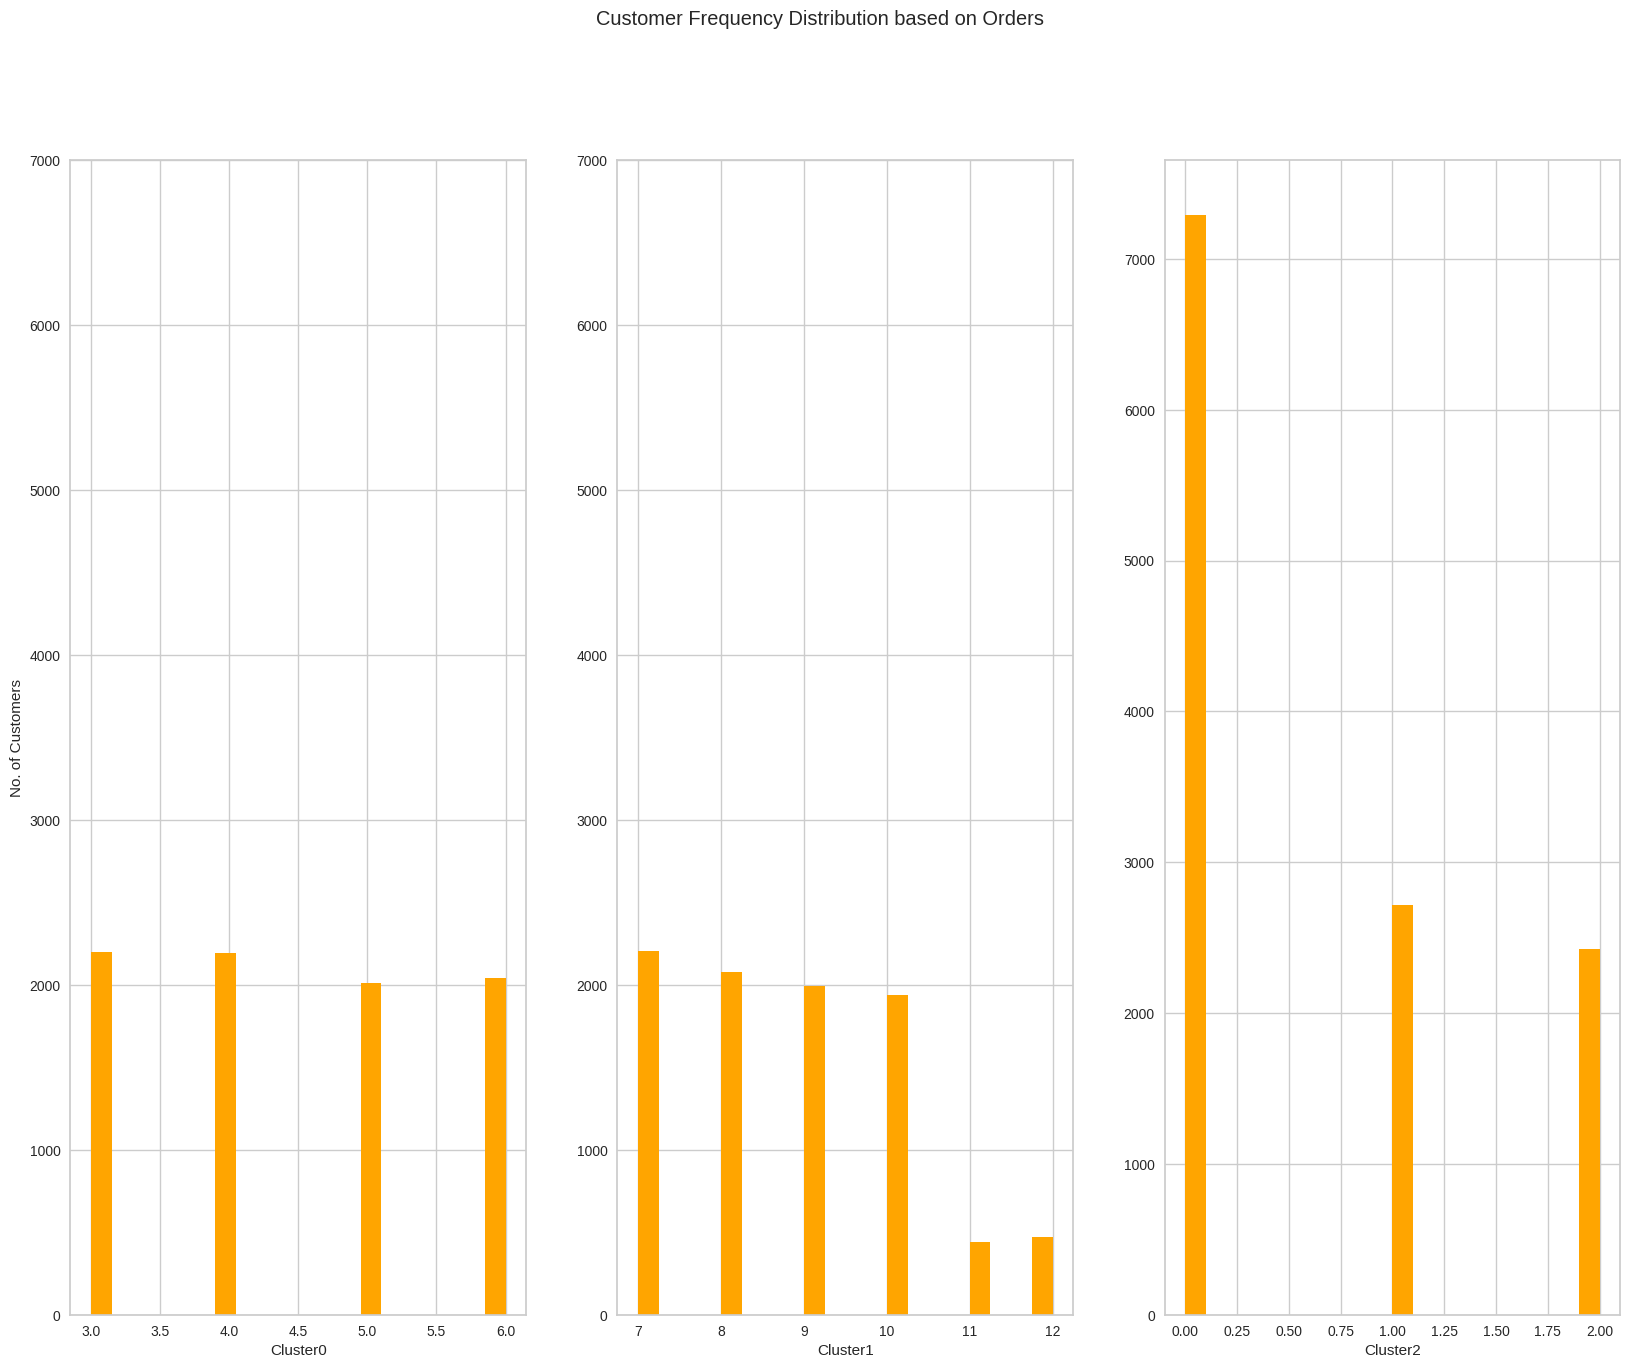

In [106]:
fig,ax=plt.subplots(1,3,figsize=(20,15))
ax[0].set_ylabel('No. of Customers')
for col in range(0,3):
  ax[col].hist(df[df.Cluster_labels==col].Orders,bins=20,color='orange')
  ax[col].set_xlabel('Cluster'+str(col))
  ax[col].set_yticks(np.arange(0,7500,1000))
fig.suptitle('Customer Frequency Distribution based on Orders')
plt.show()

In [107]:
df.groupby(['Cluster_labels','Orders']).count()[['Cust_ID']].rename(columns={'Cust_ID':'Number of Customers'})

Number of Customers
Cluster_labels Orders                     
0              3                      2199
               4                      2192
               5                      2010
               6                      2039
1              7                      2207
               8                      2080
               9                      1993
               10                     1938
               11                      441
               12                      469
2              0                      7294
               1                      2716
               2                      2422

#### Analysis based on Brands Column

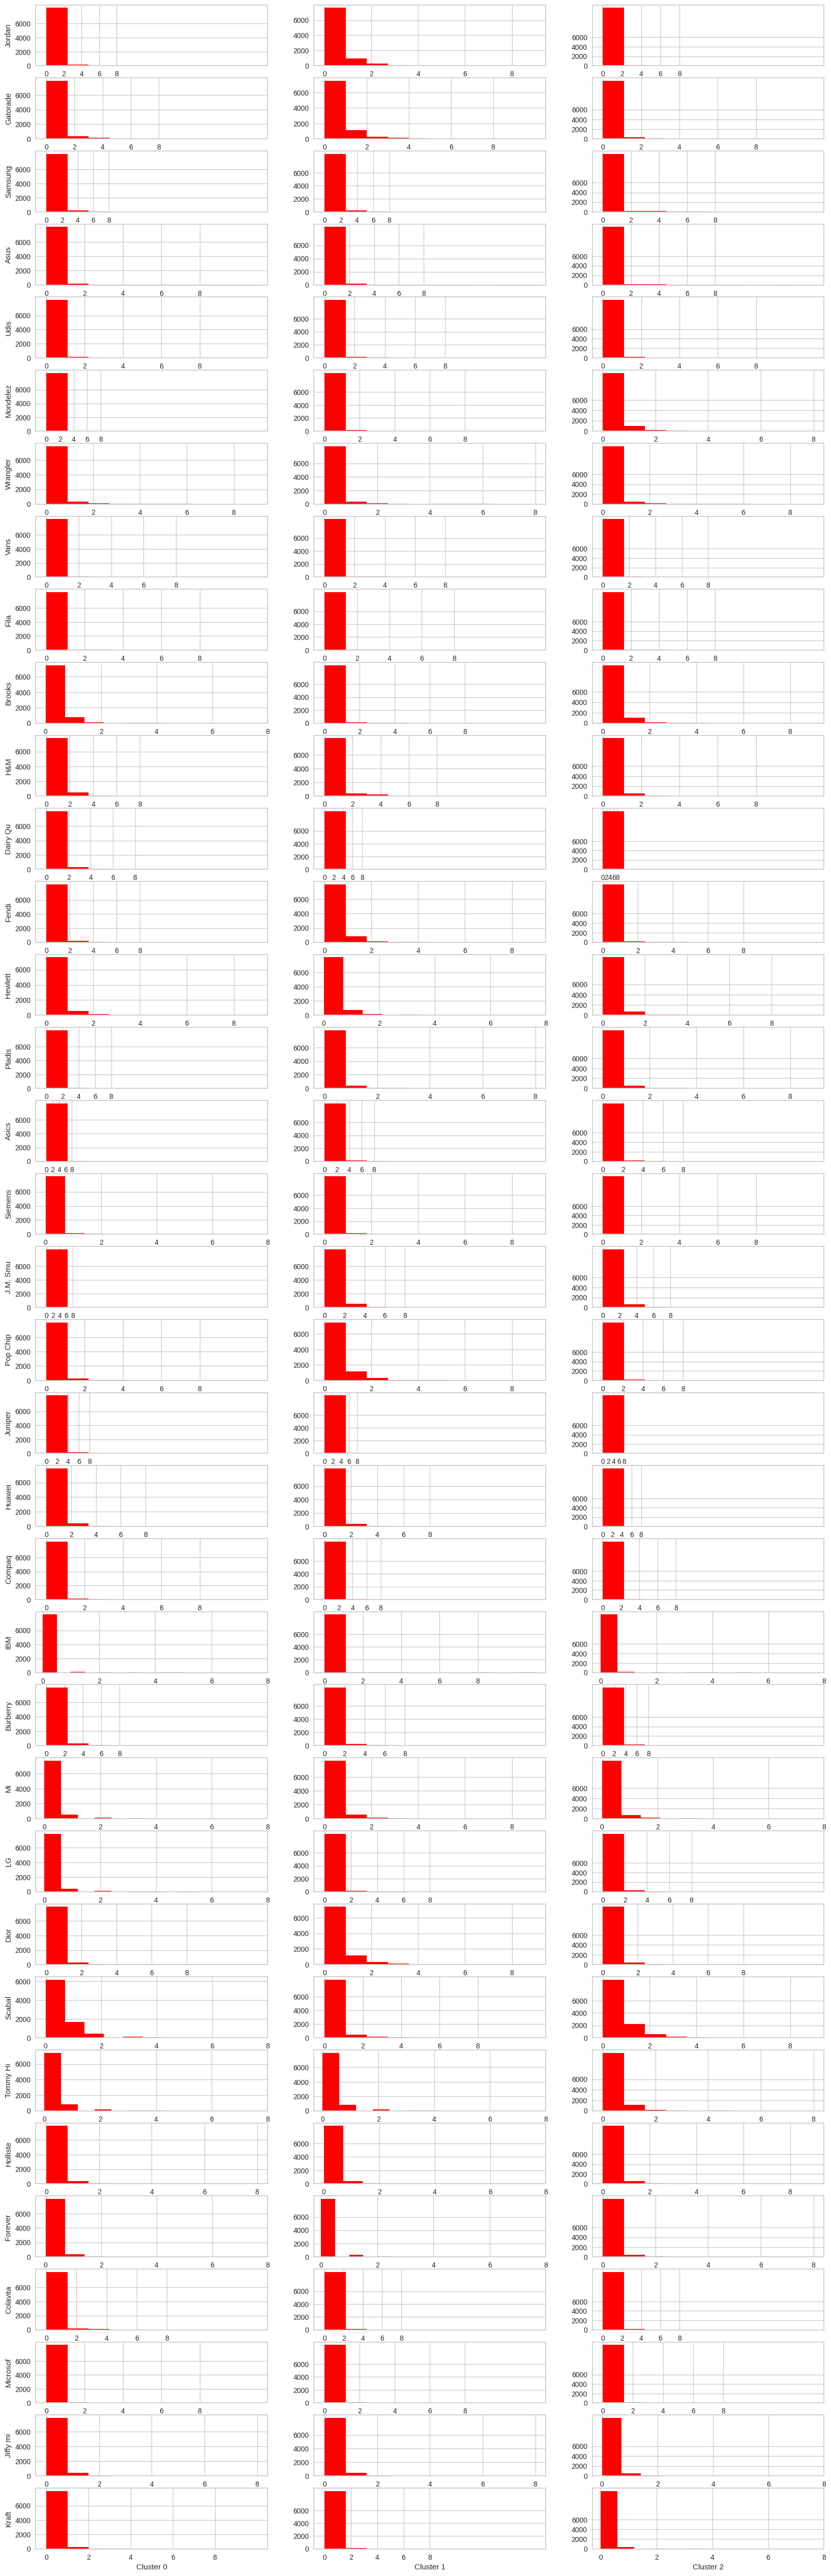

In [108]:
fig,ax=plt.subplots(35,3,figsize=(20, 65))
columns=list(df.columns)[3:]
for row in range(0,35):
  ax[row,0].set_ylabel(columns[row][0:8])
  for col in range(0,3):
    ax[row,col].hist(df[df.Cluster_labels==col][columns[row]],bins=10,color='red')
    ax[row,col].set_yticks(np.arange(0,8000,2000))
    ax[row,col].set_xticks(np.arange(0,10,2))
    if(row==34):
      ax[row,col].set_xlabel('Cluster '+str(col))
plt.show()

#### Analysis based on Total Searches Column

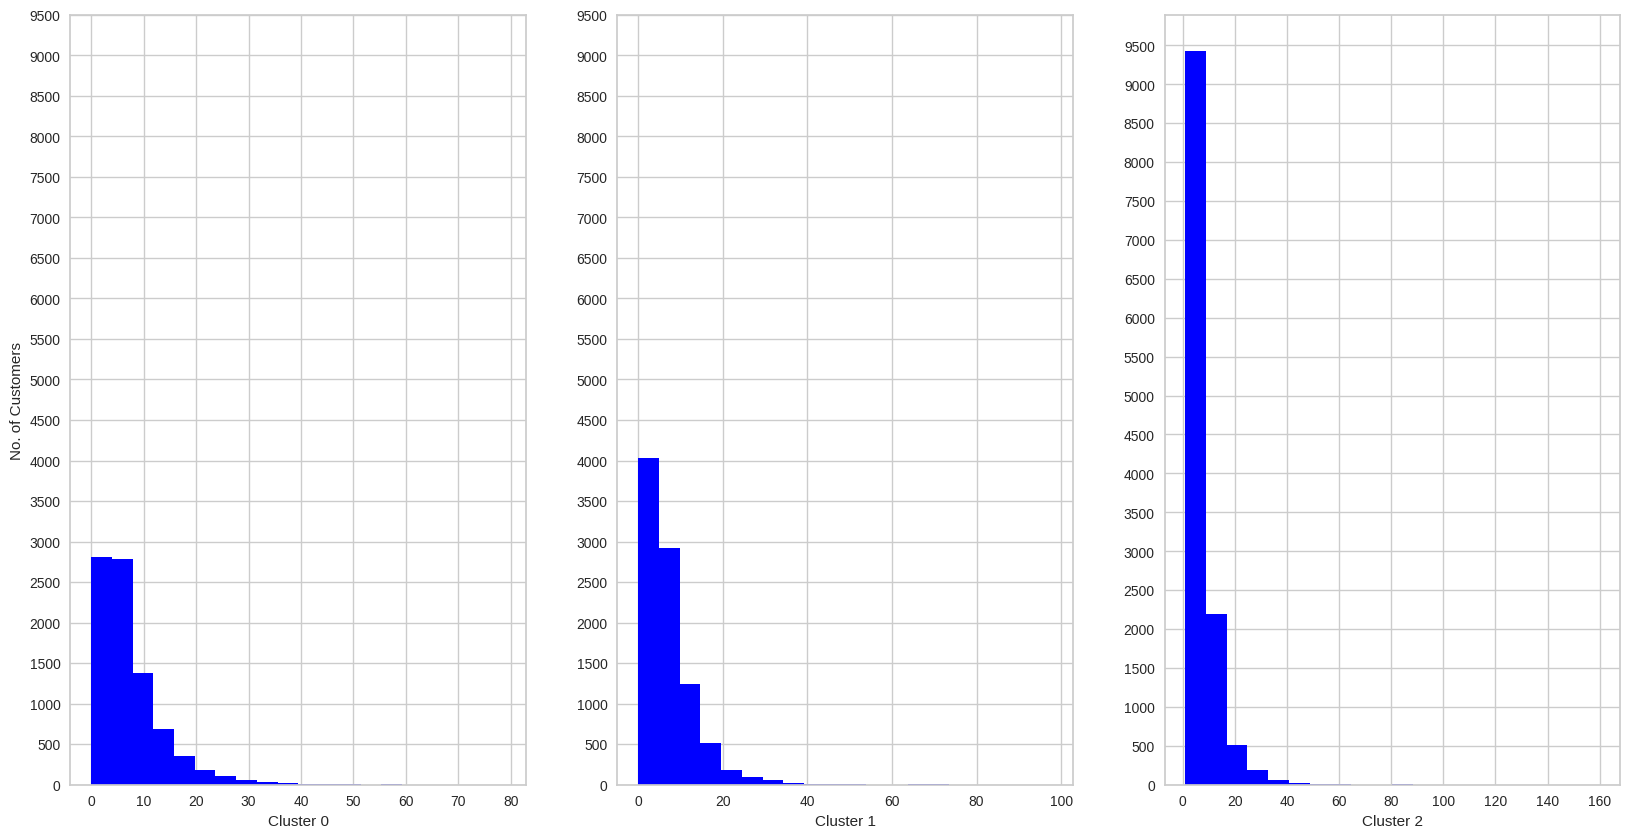

In [109]:
fig,ax=plt.subplots(1,3,figsize=(20,10))
ax[0].set_ylabel('No. of Customers')
for col in range(0,3):
  ax[col].hist(df[df.Cluster_labels==col].Total_Searches,bins=20,color='blue')
  ax[col].set_xlabel('Cluster '+str(col))
  ax[col].set_yticks(np.arange(0,10000,500))
plt.show()

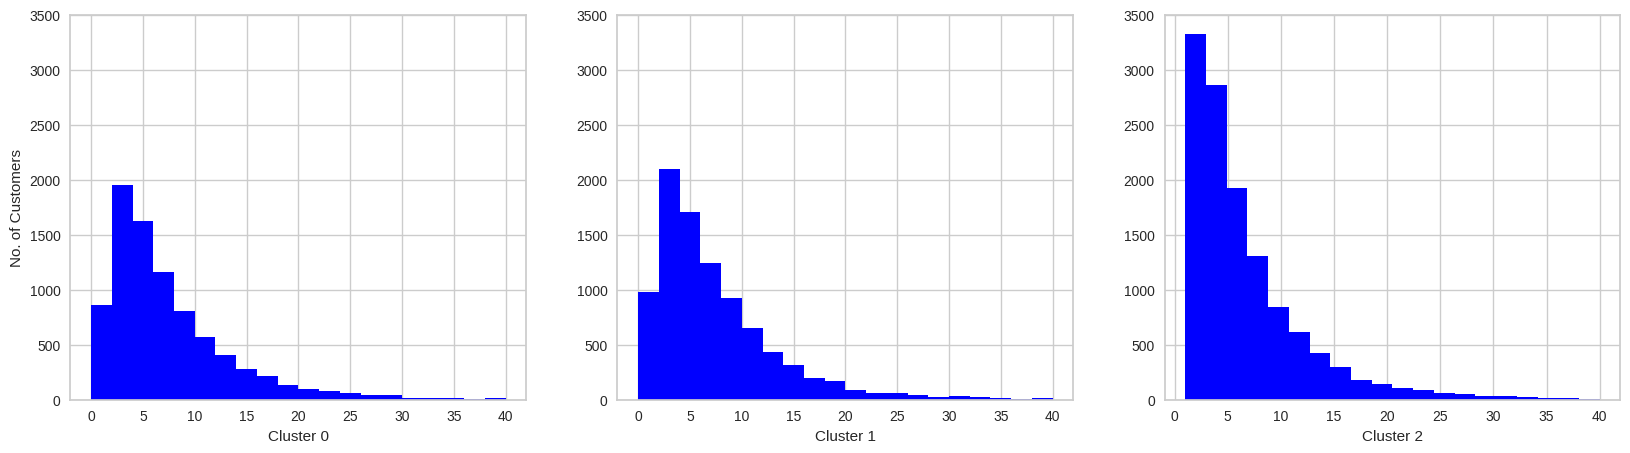

In [110]:
fig,ax=plt.subplots(1,3,figsize=(20,5))
ax[0].set_ylabel('No. of Customers')
for col in range(0,3):
  ax[col].hist(df[(df.Cluster_labels==col)&(df.Total_Searches<=40)].Total_Searches,bins=20,color='blue')
  ax[col].set_xlabel('Cluster '+str(col))
  ax[col].set_yticks(np.arange(0,4000,500))
plt.show()

## Analyzing Clusters (based on Bivariate Analysis)

In [111]:
c0_df=df.groupby(['Cluster_labels','Gender']).sum().iloc[:,1:].loc[0]
c1_df=df.groupby(['Cluster_labels','Gender']).sum().iloc[:,1:].loc[1]
c2_df=df.groupby(['Cluster_labels','Gender']).sum().iloc[:,1:].loc[2]

In [112]:
lst=[c0_df,c1_df,c2_df]

#### Analysis based on Gender and Order Columns



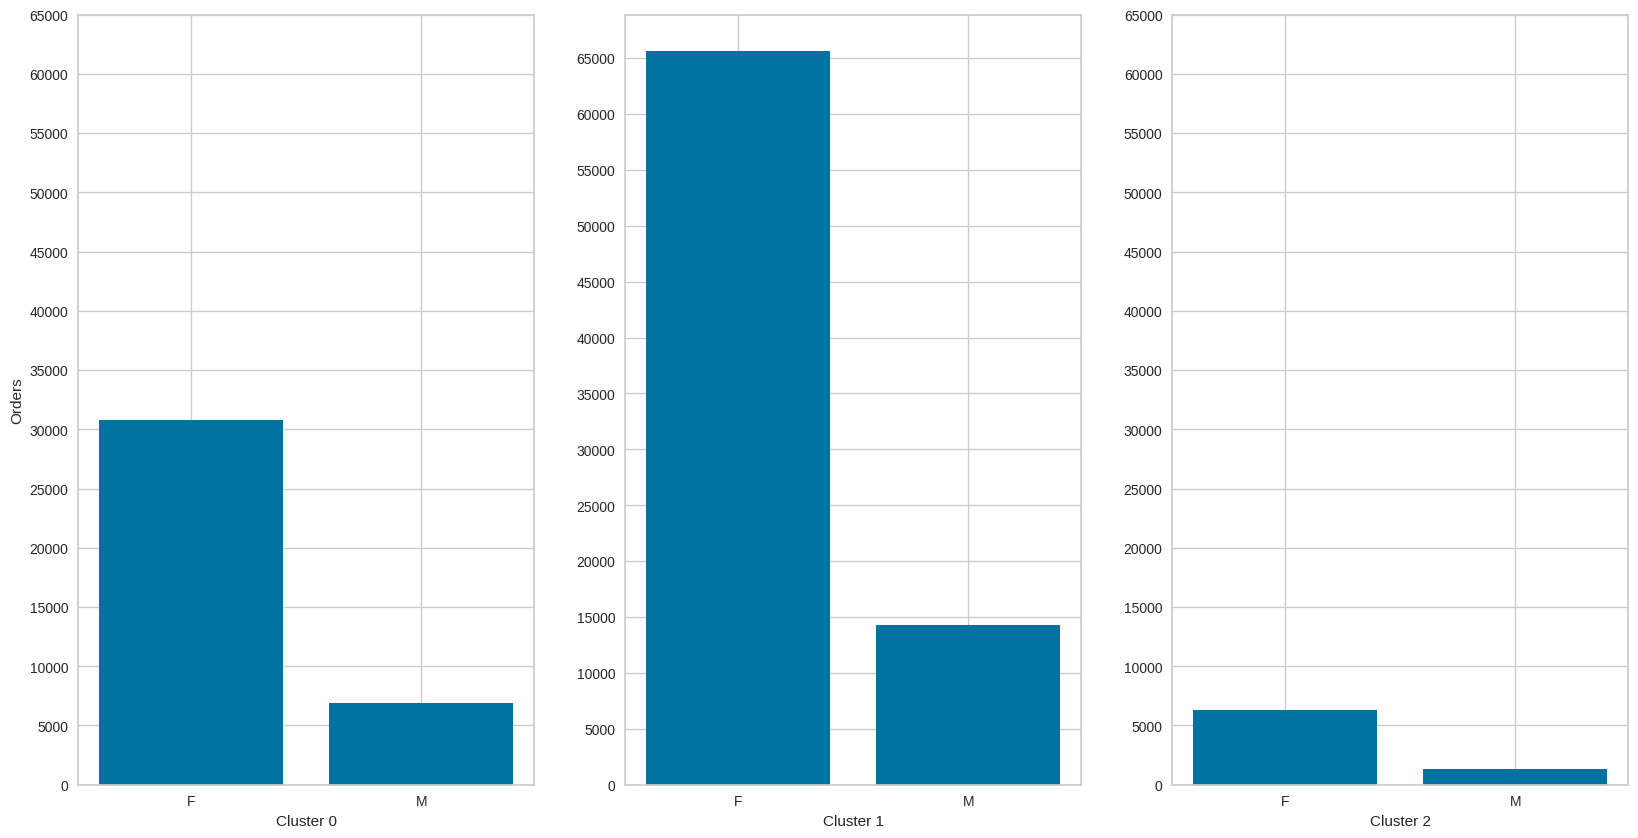

In [113]:
fig,ax=plt.subplots(1,3,figsize=(20,10))
ax[0].set_ylabel('Orders')
for col in range(0,3):
  ax[col].bar(lst[col].index,lst[col].Orders.values)
  ax[col].set_xlabel('Cluster '+str(col))
  ax[col].set_yticks(np.arange(0,68000,5000))
plt.show()

#### Analysis based on Gender and Total Searches Columns

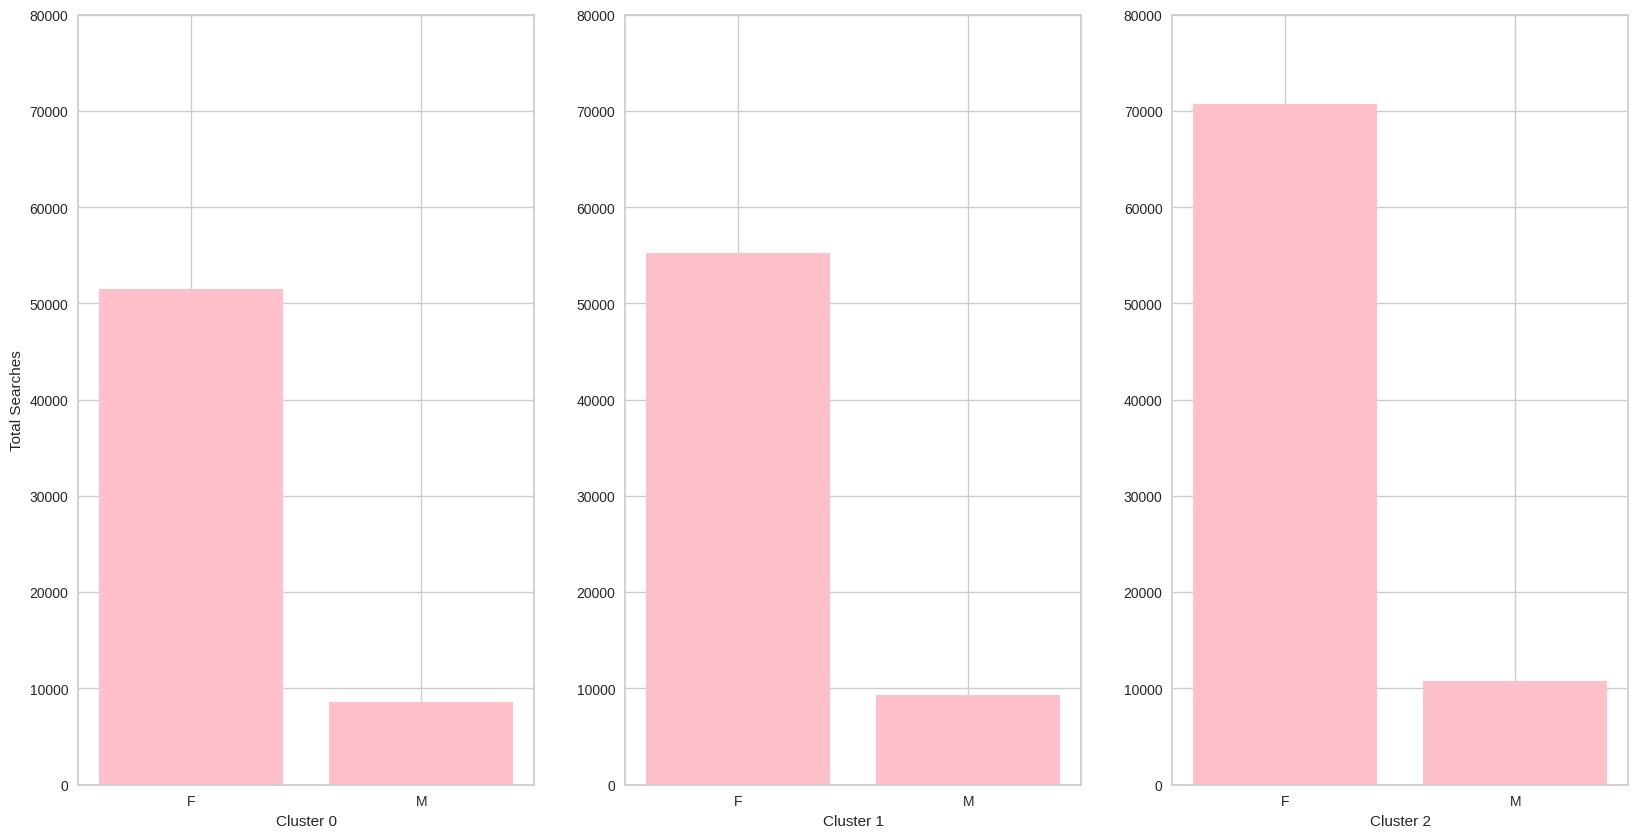

In [114]:
fig,ax=plt.subplots(1,3,figsize=(20,10))
ax[0].set_ylabel('Total Searches')
for col in range(0,3):
  ax[col].bar(lst[col].index,lst[col].Total_Searches.values,color='pink')
  ax[col].set_xlabel('Cluster '+str(col))
  ax[col].set_yticks(np.arange(0,90000,10000))
plt.show()

#### Analysis based on Order and Brands Columns

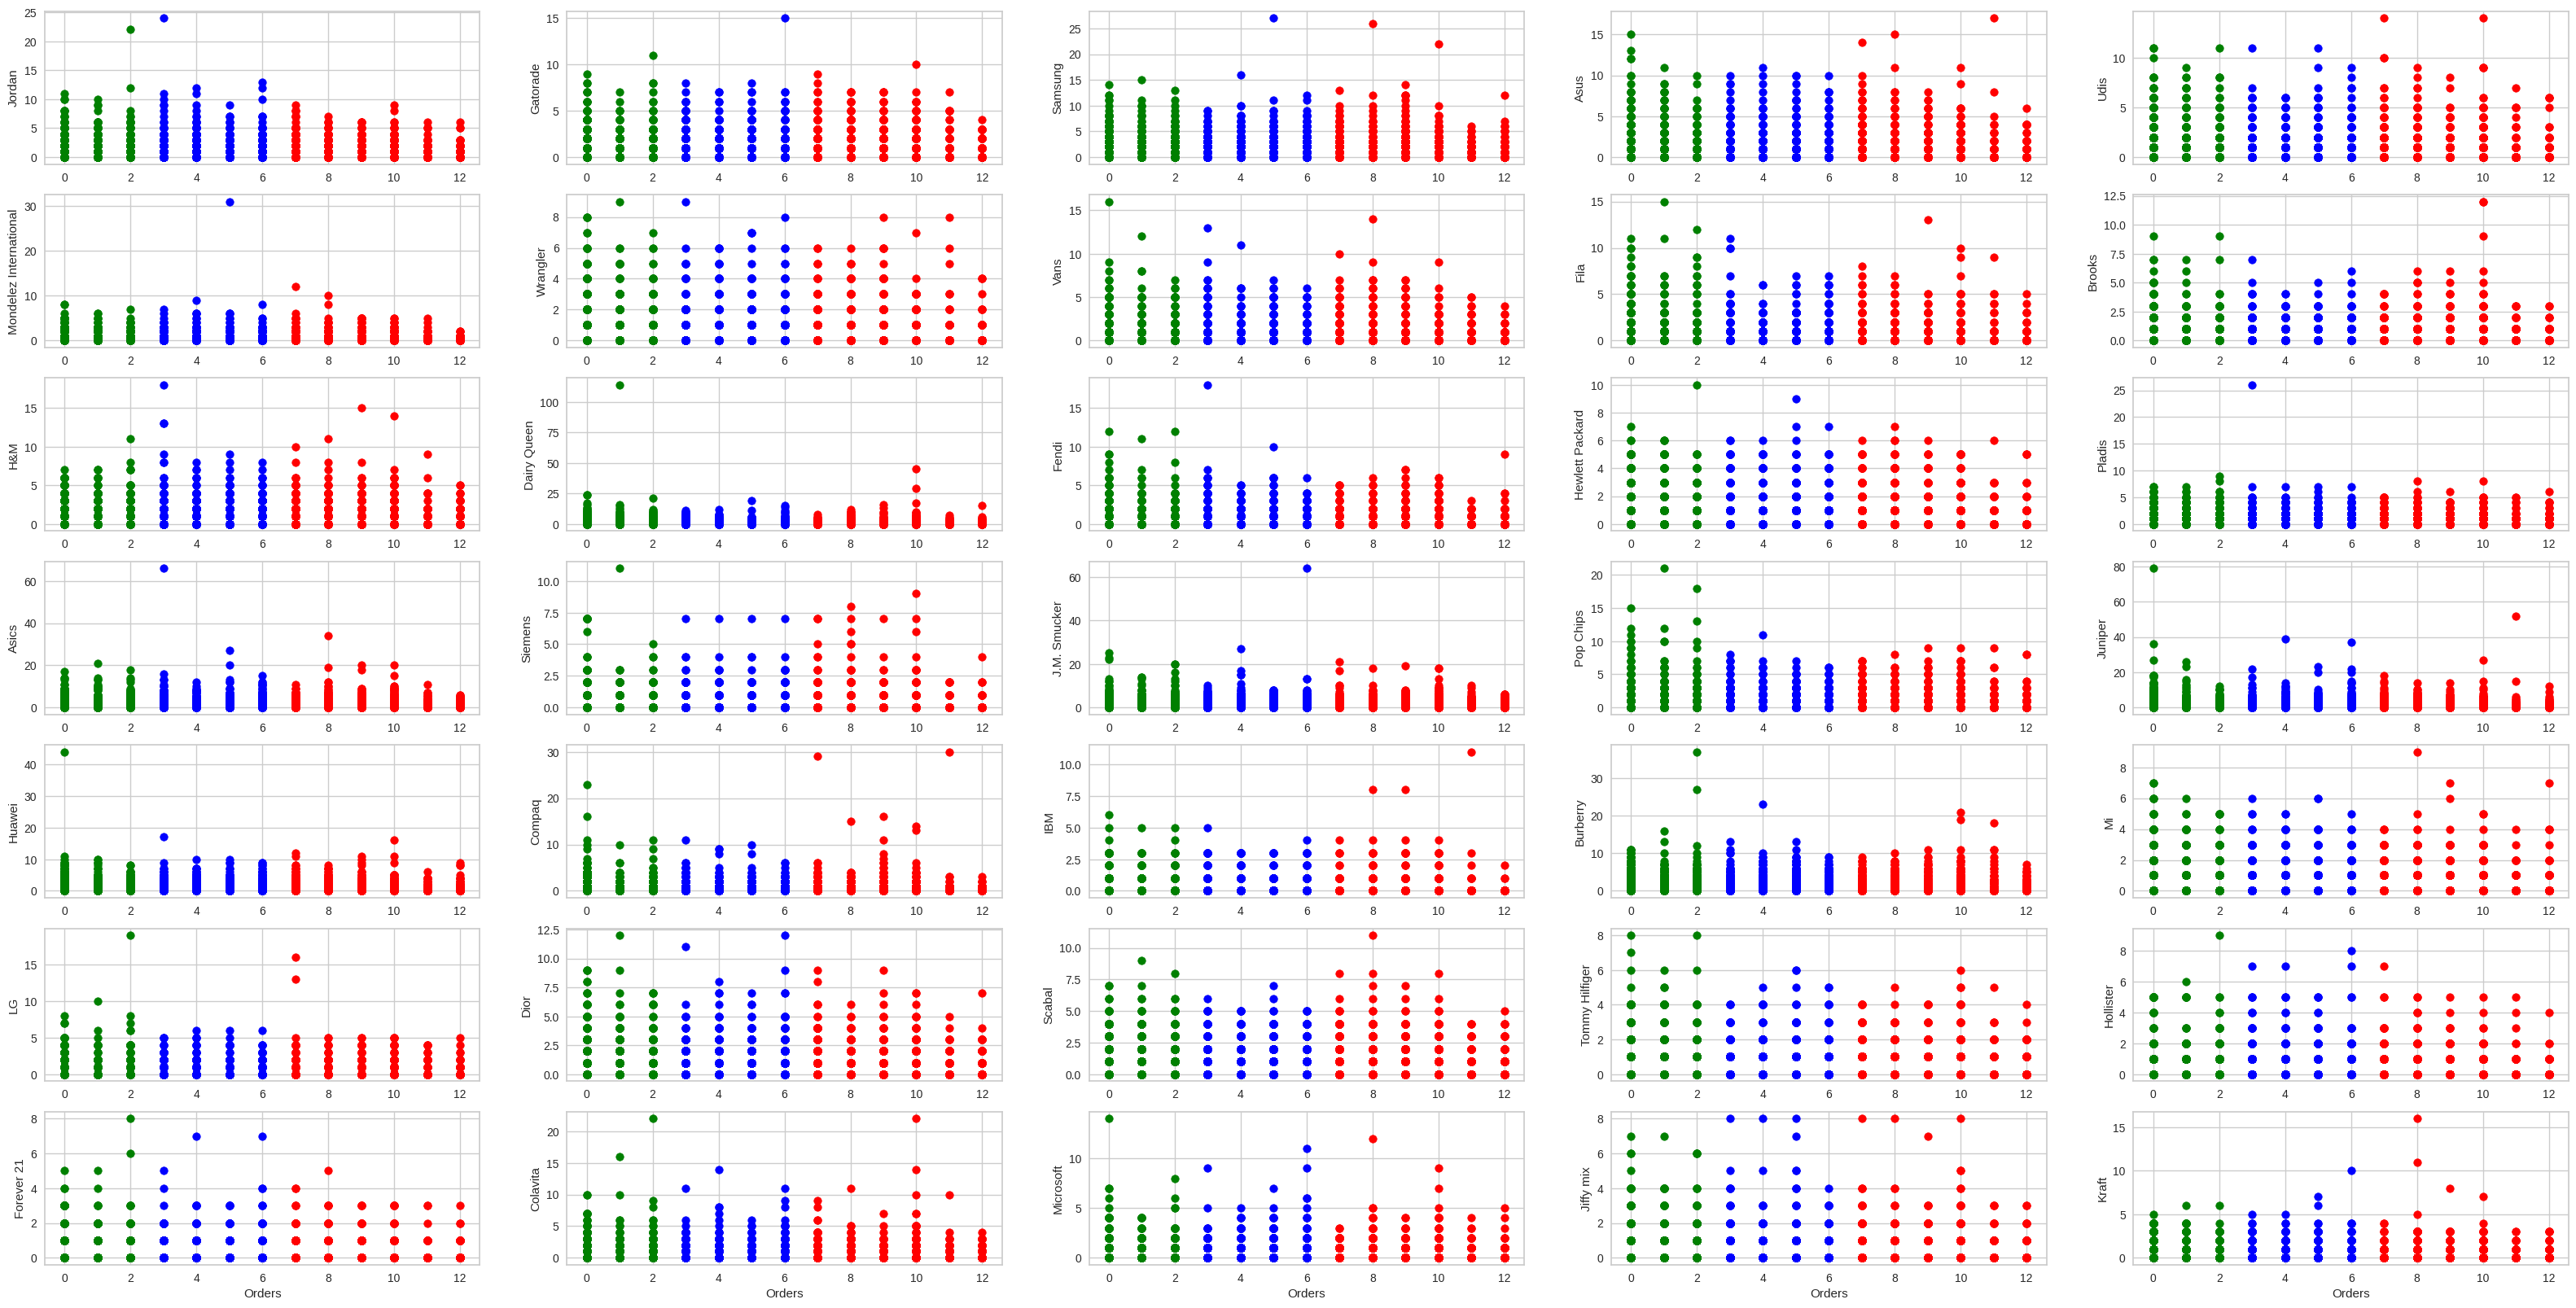

In [115]:
fig,ax=plt.subplots(7,5,figsize=(40,20))
i=0
for row in range(0,7):
  for col in range(0,5):
    ax[row,col].scatter(df[df.Cluster_labels==0].Orders,df[df.Cluster_labels==0][columns[i]],color='blue',label='Cluster 0')
    ax[row,col].scatter(df[df.Cluster_labels==1].Orders,df[df.Cluster_labels==1][columns[i]],color='red',label='Cluster 1')
    ax[row,col].scatter(df[df.Cluster_labels==2].Orders,df[df.Cluster_labels==2][columns[i]],color='green',label='Cluster 2')
    ax[row,col].set_ylabel(columns[i])
    if(row==6):
      ax[row,col].set_xlabel('Orders')
    i+=1
plt.show()

#### Analysis based on Order and Total Searches Columns

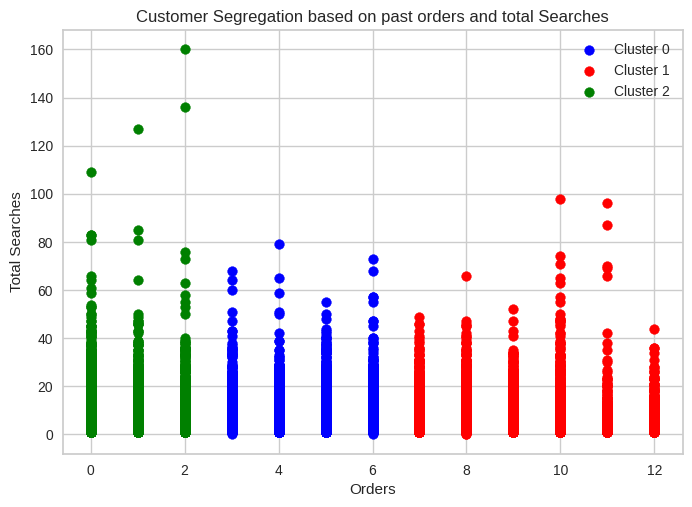

In [116]:
plt.scatter(df[df.Cluster_labels==0].Orders,df[df.Cluster_labels==0].Total_Searches,color='blue',label='Cluster 0')
plt.scatter(df[df.Cluster_labels==1].Orders,df[df.Cluster_labels==1].Total_Searches,color='red',label='Cluster 1')
plt.scatter(df[df.Cluster_labels==2].Orders,df[df.Cluster_labels==2].Total_Searches,color='green',label='Cluster 2')
plt.legend()
plt.xlabel('Orders')
plt.ylabel('Total Searches')
plt.title('Customer Segregation based on past orders and total Searches')
plt.show()